# Медицина

Проектный этап АДа (Анализа Данных) 2023\
Сделали: Сейдазымов Адиль Канатович, Тощин Олег Максимович, Андрианов Дмитрий Романович, Кучерявый Игорь Дмитриевич

# 2. Исследование данных на качество

Итоговый результат обработанных данных будет сохранен в файле `processed_data.csv`

In [266]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

## Загрузка сырых данных

In [267]:
data = pd.read_csv('content/raw_data.csv')
data.head()

Развитие ОПП               ХБП  Возраст,  Пол  ГБ,  Сахарный диабет  \
0          нет      Стадия C1-C2        67    1    1                1   
1         есть      Стадия C1-C2        69    1    1                0   
2          нет  Пациенты без ХБП        50    1    1                0   
3          нет      Стадия C1-C2        62    1    1                0   
4         есть      Стадия C1-C2        55    1    1                1   

   Стенокардия,  Инфаркт миокарда  Мерцательная аритмия  \
0             1                 1                     0   
1             1                 0                     0   
2             1                 1                     0   
3             1                 1                     1   
4             1                 1                     0   

   Желудочковая экстрасистолия  ...  Толщина паренхимы почек  АИК  \
0                            0  ...                       14    0   
1                            0  ...                       15    1   
2                            0  ...                       17    0   
3                            0  ...                       16    1   
4                            0  ...                       15    1   

   Количество шунтов  Длительность операции  Длительность АИК  \
0                  1                    150                 0   
1                  4                    235               143   
2                  1                    210                 0   
3                  3                    210                71   
4                  3                    265               116   

  Время пережатия аорты Объем кровопотерии Объем гемотрансфузии Объем инфузий  \
0                     0                200                  830          2900   
1                   121                600                  640           900   
2                     0                250                    0          1800   
3                    43                500                 1283          1700   
4                    74                500                 1560          1800   

  Диурез  
0    900  
1    800  
2    500  
3   1700  
4   1300  

[5 rows x 67 columns]

## 2.1 Привести формат названий столбцов к PEP-8 формату

Создадим список правильных названий полей из ТЗ

In [268]:
actual_columns = [
    'Развитие ОПП',
    'ХБП',
    'Возраст',
    'Пол',
    'ГБ',
    'Сахарный диабет',
    'Стенокардия',
    'Инфаркт миокарда',
    'Мерцательная аритмия',
    'Желудочковая экстрасистолия',
    'А-В блокада',
    'Блокада ножек пучка Гиса',
    'САД',
    'ДАД',
    'Креатинин крови',
    'Мочевина',
    'СКФ расч',
    'Калий',
    'Натрий',
    'Хлориды',
    'Кальций',
    'РН',
    'ВЕ',
    'НСО3',
    'РО2',
    'РСО2',
    'Оксигем',
    'Общ.СО2',
    'Гемоглобин',
    'Лейкоциты',
    'Тромбоциты',
    'ЧСС',
    'Интервал Q-T',
    'QRS',
    'ХСН',
    'НК',
    'Масса миокарда ЛЖ',
    'Фракция изгнания',
    'АР',
    'Давл. в ЛА',
    'УО',
    'МО',
    'ДД ЛЖ',
    'СД ЛЖ',
    'КДО',
    'КСО',
    'КДР правого желудочка',
    'Размер левого предсердия',
    'АлАт',
    'АсАт',
    'Холестерин',
    'Триглицериды',
    'ЛПОНП',
    'ЛПНП',
    'Общий белок',
    'АЧТВ',
    'ИМТ',
    'Толщина паренхимы почек',
    'АИК',
    'Количество шунтов',
    'Длительность операции',
    'Длительность АИК',
    'Время пережатия аорты',
    'Объем кровопотерии',
    'Объем гемотрансфузии',
    'Объем инфузий',
    'Диурез'
]

Переименуем и отформатируем в PEP-8 все поля

In [269]:
data.columns = actual_columns
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.head(5)

развитие_опп               хбп  возраст  пол  гб  сахарный_диабет  \
0          нет      Стадия C1-C2       67    1   1                1   
1         есть      Стадия C1-C2       69    1   1                0   
2          нет  Пациенты без ХБП       50    1   1                0   
3          нет      Стадия C1-C2       62    1   1                0   
4         есть      Стадия C1-C2       55    1   1                1   

   стенокардия  инфаркт_миокарда  мерцательная_аритмия  \
0            1                 1                     0   
1            1                 0                     0   
2            1                 1                     0   
3            1                 1                     1   
4            1                 1                     0   

   желудочковая_экстрасистолия  ...  толщина_паренхимы_почек  аик  \
0                            0  ...                       14    0   
1                            0  ...                       15    1   
2                            0  ...                       17    0   
3                            0  ...                       16    1   
4                            0  ...                       15    1   

   количество_шунтов  длительность_операции  длительность_аик  \
0                  1                    150                 0   
1                  4                    235               143   
2                  1                    210                 0   
3                  3                    210                71   
4                  3                    265               116   

  время_пережатия_аорты объем_кровопотерии объем_гемотрансфузии объем_инфузий  \
0                     0                200                  830          2900   
1                   121                600                  640           900   
2                     0                250                    0          1800   
3                    43                500                 1283          1700   
4                    74                500                 1560          1800   

  диурез  
0    900  
1    800  
2    500  
3   1700  
4   1300  

[5 rows x 67 columns]

## 2.2 Исследовать тип данных, привести данные к правильному типу, где это необходимо

Посмотрим на типы признаков

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   развитие_опп                 200 non-null    object
 1   хбп                          200 non-null    object
 2   возраст                      200 non-null    int64 
 3   пол                          200 non-null    int64 
 4   гб                           200 non-null    int64 
 5   сахарный_диабет              200 non-null    int64 
 6   стенокардия                  200 non-null    int64 
 7   инфаркт_миокарда             200 non-null    int64 
 8   мерцательная_аритмия         200 non-null    int64 
 9   желудочковая_экстрасистолия  200 non-null    int64 
 10  а-в_блокада                  200 non-null    int64 
 11  блокада_ножек_пучка_гиса     200 non-null    int64 
 12  сад                          200 non-null    int64 
 13  дад                          200 no

Разделим колонки на числовые и номинальные

In [271]:
numerical_columns = [col for col in data.columns if data[col].dtype == "int64"]
categorial_columns = [col for col in data.columns if data[col].dtype == "object"]
categorial_columns

['развитие_опп',
 'хбп',
 'мочевина',
 'скф_расч',
 'калий',
 'натрий',
 'хлориды',
 'кальций',
 'рн',
 'ве',
 'нсо3',
 'ро2',
 'рсо2',
 'оксигем',
 'общ.со2',
 'гемоглобин',
 'лейкоциты',
 'чсс',
 'мо',
 'дд_лж',
 'сд_лж',
 'кдр_правого_желудочка',
 'размер_левого_предсердия',
 'холестерин',
 'триглицериды',
 'лпонп',
 'лпнп',
 'общий_белок',
 'ачтв',
 'имт',
 'толщина_паренхимы_почек']

Исходя из ТЗ выберем из нашего списка полей "categorial_columns" фактические числовые признаки

In [272]:
wrong_categ_columns = [
    'мочевина',
    'скф_расч',
    'калий',
    'натрий',
    'хлориды',
    'кальций',
    'рн',
    'ве',
    'нсо3',
    'ро2',
    'рсо2',
    'оксигем',
    'общ.со2',
    'гемоглобин',
    'лейкоциты',
    'чсс',
    'мо',
    'дд_лж',
    'сд_лж',
    'кдр_правого_желудочка',
    'размер_левого_предсердия',
    'холестерин',
    'триглицериды',
    'лпонп',
    'лпнп',
    'общий_белок',
    'ачтв',
    'имт',
    'толщина_паренхимы_почек'
]

Посмотрим на эти признаки для дальнейшего форматирования. Для отображения всех признаков выведем таблицу по половинкам

In [273]:
# 1-ая половина
data[wrong_categ_columns[:len(wrong_categ_columns)//2]].head()

мочевина скф_расч калий натрий хлориды кальций    рн    ве  нсо3    ро2  \
0      8,2       86  4,51    143     100    0,99  7,42  -2,1  21,4  149,4   
1      6,2       63  4,92    140     NaN    1,02  7,49   1,5  23,9    128   
2      5,5      105   4,5    140     NaN    0,96  7,37  -4,8  19,5     88   
3      5,9       68  4,68    147     102    0,94  7,44  -1,1  22,2    192   
4      5,3       95  4,48    141     103    0,85  7,41   0,8  25,7    271   

   рсо2 оксигем общ.со2 гемоглобин  
0  33,4      99    22,4        115  
1  31,6    98,8    24,9        134  
2    34    96,6    20,5        156  
3  33,4    99,4    23,2        175  
4  41,7    99,6      26        134

In [274]:
# 2-ая половина
data[wrong_categ_columns[len(wrong_categ_columns)//2:]].head()

лейкоциты чсс    мо дд_лж сд_лж кдр_правого_желудочка  \
0      7,47  61  6,78   5,8   3,6                   2,7   
1       5,5  66  5,82     6   4,3                   2,6   
2         8  67  4,26     5   3,4                     3   
3       6,8  94  6,54   5,7   3,5                   2,2   
4      10,7  81  4,98   5,1   3,2                   2,3   

  размер_левого_предсердия холестерин триглицериды лпонп  лпнп общий_белок  \
0                      4,2       2,47         0,97  0,44   0,9          76   
1                      3,7       5,73         2,12  1,42  0,84          75   
2                        4       6,22          1,7  1,13  0,78          70   
3                      3,8       4,22         1,25  1,12  0,57          83   
4                      4,2       3,52         2,52  0,69  1,15          74   

  ачтв имт толщина_паренхимы_почек  
0   34  30                      14  
1   31  29                      15  
2   33  30                      17  
3   33  30                      16  
4   31  33                      15

Преобразуем признаки в числовые

Строки были преобразованы рассматривая следующие причины:
1. Тип объекта - число
2. Тип объекта - строка в виде числа с запятой
3. Тип объекта - строка в виде целого числа либо числа с точкой
4. Другие символы в объекте

In [275]:
def convert_to_number(x):
    if isinstance(x, int) or isinstance(x, float):
        return x
    elif ',' in str(x):
        return float(x.replace(',', '.'))
    elif '.' in str(x) or x.replace('-', '').isdigit():
        return float(x)
    elif not x.isdigit():
        return x


for column in wrong_categ_columns:
    data[column] = data[column].apply(lambda x: convert_to_number(x))

Посмотрим на результаты

In [276]:
data[wrong_categ_columns[:len(wrong_categ_columns)//2]].head()

мочевина  скф_расч  калий  натрий  хлориды  кальций    рн   ве  нсо3  \
0       8.2      86.0   4.51   143.0    100.0     0.99  7.42 -2.1  21.4   
1       6.2      63.0   4.92   140.0      NaN     1.02  7.49  1.5  23.9   
2       5.5     105.0   4.50   140.0      NaN     0.96  7.37 -4.8  19.5   
3       5.9      68.0   4.68   147.0    102.0     0.94  7.44 -1.1  22.2   
4       5.3      95.0   4.48   141.0    103.0     0.85  7.41  0.8  25.7   

     ро2  рсо2  оксигем  общ.со2  гемоглобин  
0  149.4  33.4     99.0     22.4       115.0  
1  128.0  31.6     98.8     24.9       134.0  
2   88.0  34.0     96.6     20.5       156.0  
3  192.0  33.4     99.4     23.2       175.0  
4  271.0  41.7     99.6     26.0       134.0

In [277]:
data[wrong_categ_columns[len(wrong_categ_columns)//2:]].head()

лейкоциты   чсс    мо  дд_лж  сд_лж  кдр_правого_желудочка  \
0       7.47  61.0  6.78    5.8    3.6                    2.7   
1       5.50  66.0  5.82    6.0    4.3                    2.6   
2       8.00  67.0  4.26    5.0    3.4                    3.0   
3       6.80  94.0  6.54    5.7    3.5                    2.2   
4      10.70  81.0  4.98    5.1    3.2                    2.3   

   размер_левого_предсердия  холестерин  триглицериды  лпонп  лпнп  \
0                       4.2        2.47          0.97   0.44  0.90   
1                       3.7        5.73          2.12   1.42  0.84   
2                       4.0        6.22          1.70   1.13  0.78   
3                       3.8        4.22          1.25   1.12  0.57   
4                       4.2        3.52          2.52   0.69  1.15   

   общий_белок  ачтв   имт  толщина_паренхимы_почек  
0         76.0  34.0  30.0                     14.0  
1         75.0  31.0  29.0                     15.0  
2         70.0  33.0  30.0                     17.0  
3         83.0  33.0  30.0                     16.0  
4         74.0  31.0  33.0                     15.0

Для проверки результатов еще раз посмотрим на числовые признаки на наличие строк. Для этого выведем названия признаков, в которых есть строки

In [278]:
# Добавляем в числовые признаки наши обработанные фичи
numerical_columns += wrong_categ_columns

for col in numerical_columns:
    if data[col].dtype == 'object':
        print(col)

чсс


Заметили, что в "чсс" есть строки, посмотрим на них

In [279]:
for value in data['чсс']:
    if isinstance(value, str):
        print(value)

7o


Это скорее всего опечатка при вводе данных. Заменяем 7о на 70

In [280]:
data['чсс'] = data['чсс'].replace('7o', 70)
data['чсс'].dtypes == 'object'

False

## 2.3 Обработка аномальных значений (абсурдных или физиологически невозможных)

Рассмотрим категориальные признаки на наличие ошибок

In [281]:
# Функция для вывода категорий признака
def categories_count(columns):
    cats = ''
    for col in columns:
        cats += f'{data[col].value_counts()}\n'
    return cats

In [282]:
categ_columns = [col for col in data.columns if data[col].dtype == 'object']
print(categories_count(categ_columns))

развитие_опп
есть    125
нет      75
Name: count, dtype: int64
хбп
Стадия C1-C2        94
Пациенты без ХБП    92
Стадия С3           14
Name: count, dtype: int64



Не были обнаружены ошибки в категориальных столбцах.

Проверим бинарные признаки на наличие лишних категорий

In [283]:
binary_columns = [
    "пол",
    "гб",
    "сахарный_диабет",
    "стенокардия",
    "инфаркт_миокарда",
    "мерцательная_аритмия",
    "желудочковая_экстрасистолия",
    "а-в_блокада",
    "блокада_ножек_пучка_гиса",
    "хсн",
    "нк",
    "ар",
    "аик",
]

print(categories_count(binary_columns))

пол
1    183
0     17
Name: count, dtype: int64
гб
1    177
0     23
Name: count, dtype: int64
сахарный_диабет
0    134
1     66
Name: count, dtype: int64
стенокардия
1    192
0      8
Name: count, dtype: int64
инфаркт_миокарда
1    132
0     68
Name: count, dtype: int64
мерцательная_аритмия
0    149
1     51
Name: count, dtype: int64
желудочковая_экстрасистолия
0    171
1     29
Name: count, dtype: int64
а-в_блокада
0    182
1     18
Name: count, dtype: int64
блокада_ножек_пучка_гиса
0    168
1     32
Name: count, dtype: int64
хсн
1    195
0      5
Name: count, dtype: int64
нк
0    119
1     81
Name: count, dtype: int64
ар
0    134
1     66
Name: count, dtype: int64
аик
1    160
0     40
Name: count, dtype: int64



Лишних категорий в бинарных столбцах не были обнаружены

### Выбросы

Исключим бинарные признаки из списка числовых

In [284]:
for col in binary_columns:
    numerical_columns.remove(col)

Для очистки выбросов используем технику межквартального размаха. IQR = 1.5 поскольку это поможет сохранить больше информации, исключая только явные выбросы, а не те, которые вызваны особенными условиями небольшой группы пациентов

In [285]:
# Очистка выбросов межквартильным размахом
def clean_outliers(col):
    median = data[col].median()
    Q3, Q1 = np.percentile(data[col], [75, 25])
    IQR = Q3 - Q1
    high = median + 1.5 * IQR
    low = median - 1.5 * IQR
    return data[col].apply(lambda x: median if x > high or x < low else x)

Выведем гистограммы распределений признаков

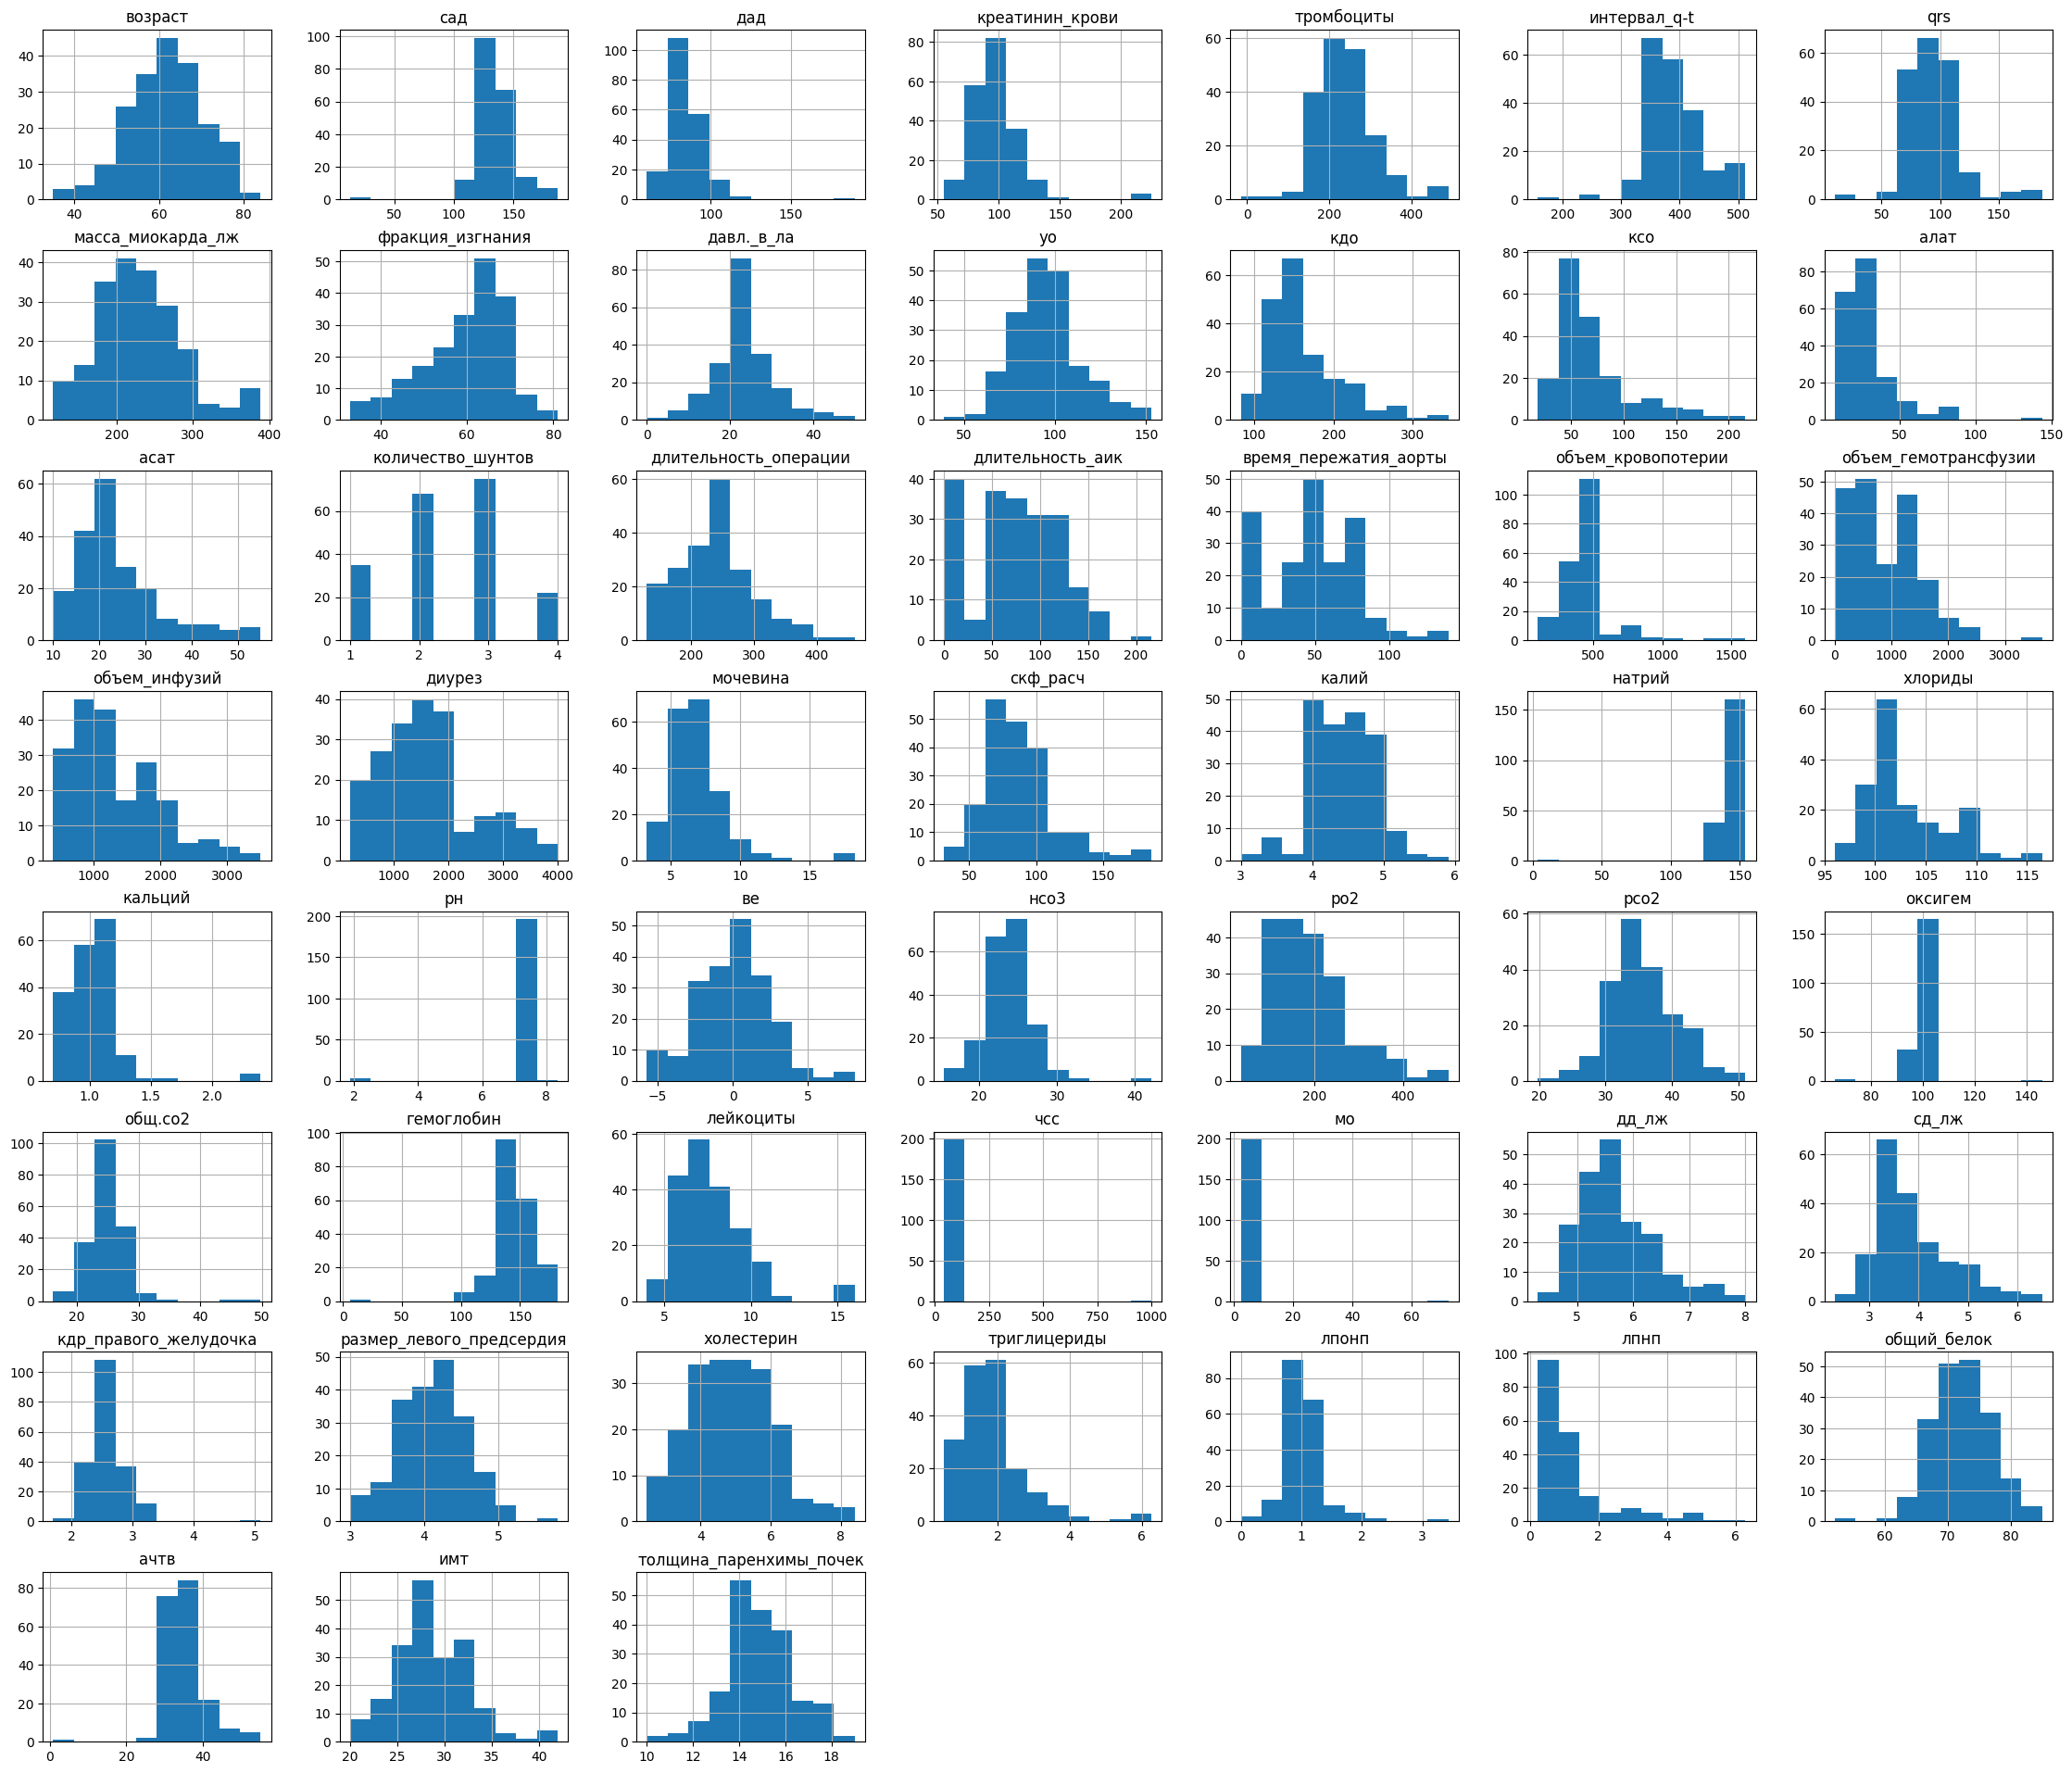

In [286]:
data.hist(column=numerical_columns, figsize=(28, 24))
None

Избавляемся от выбросов в признаках, за исключением возраста и количества, так как у них отсутствуют аномальные значения, исходя из гистограммы

In [287]:
for col in numerical_columns:
    if col != 'возраст' and col != 'количество_шунтов':
        data[col] = clean_outliers(col)

Проверим результаты с помощью ящиков с усами

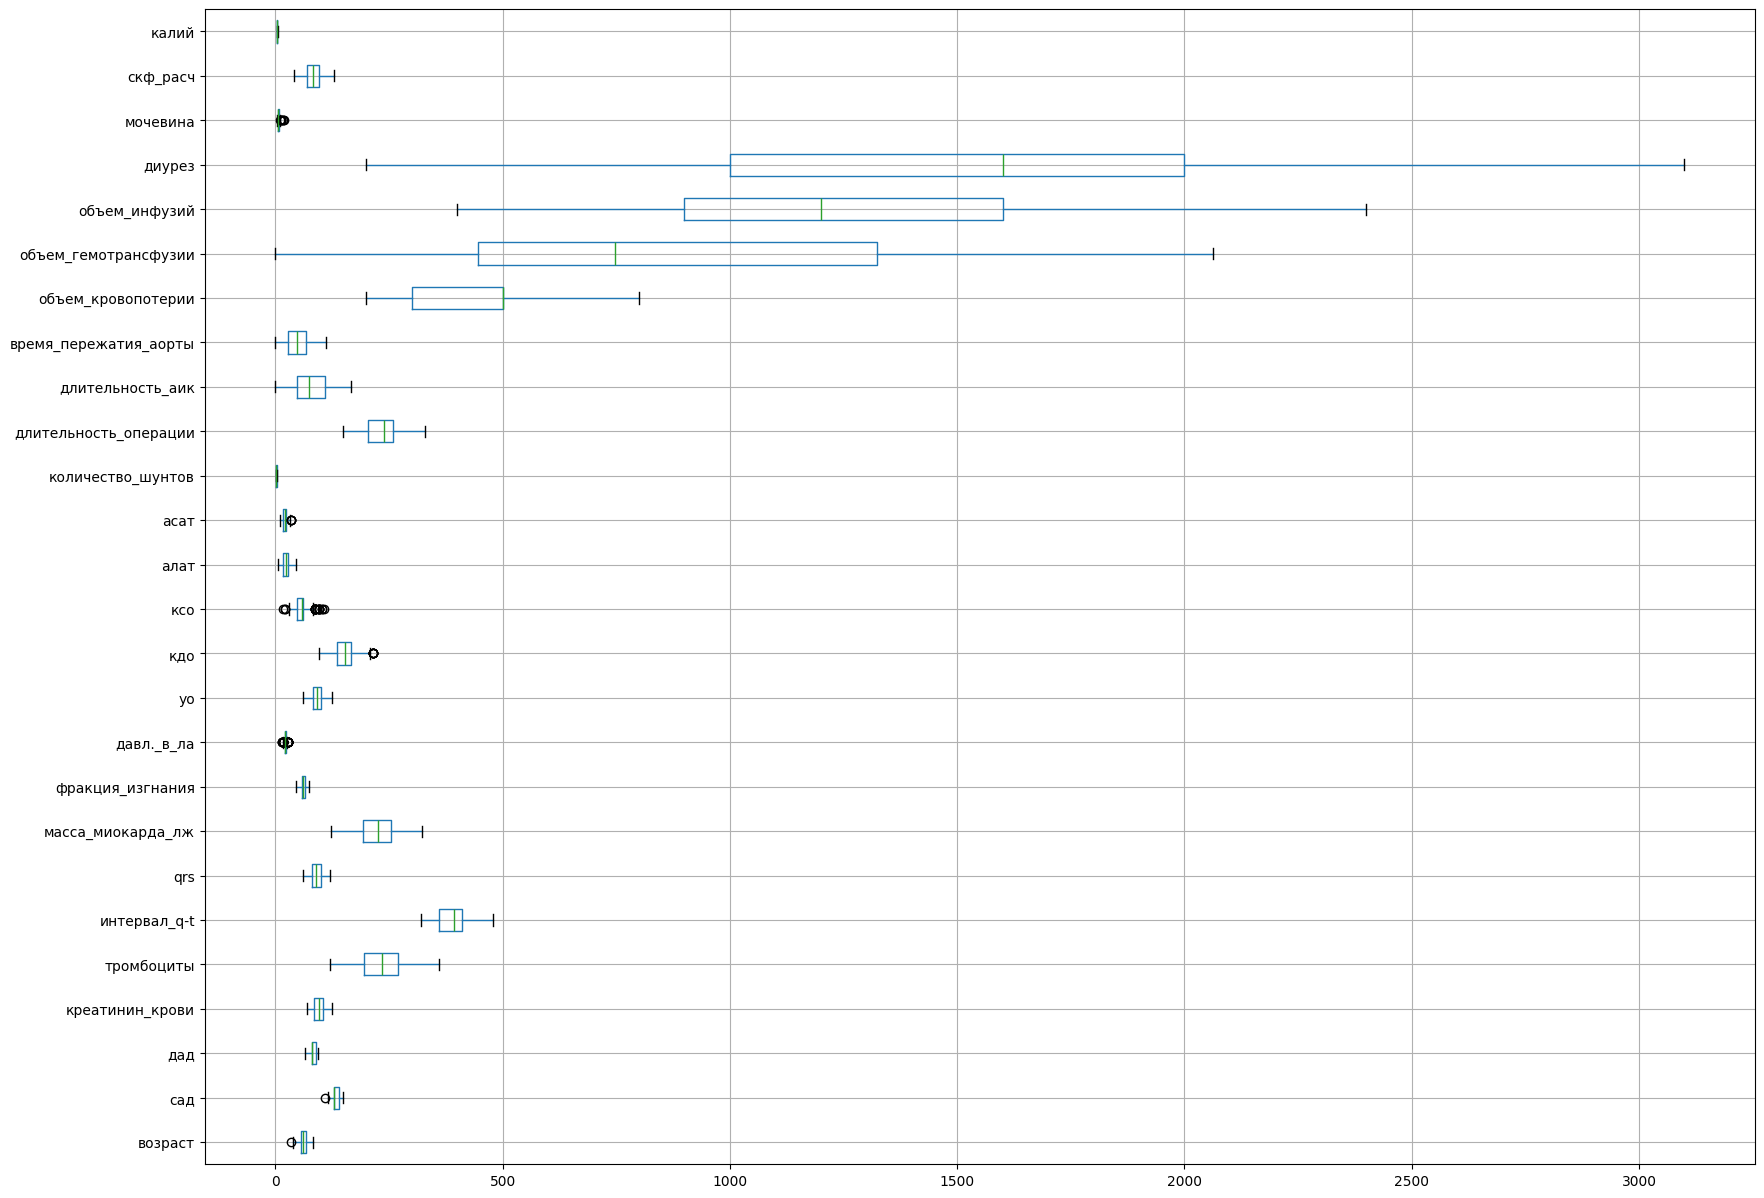

In [288]:
data.boxplot(column=numerical_columns[:len(numerical_columns)//2], vert=False, figsize=(20, 15))
None

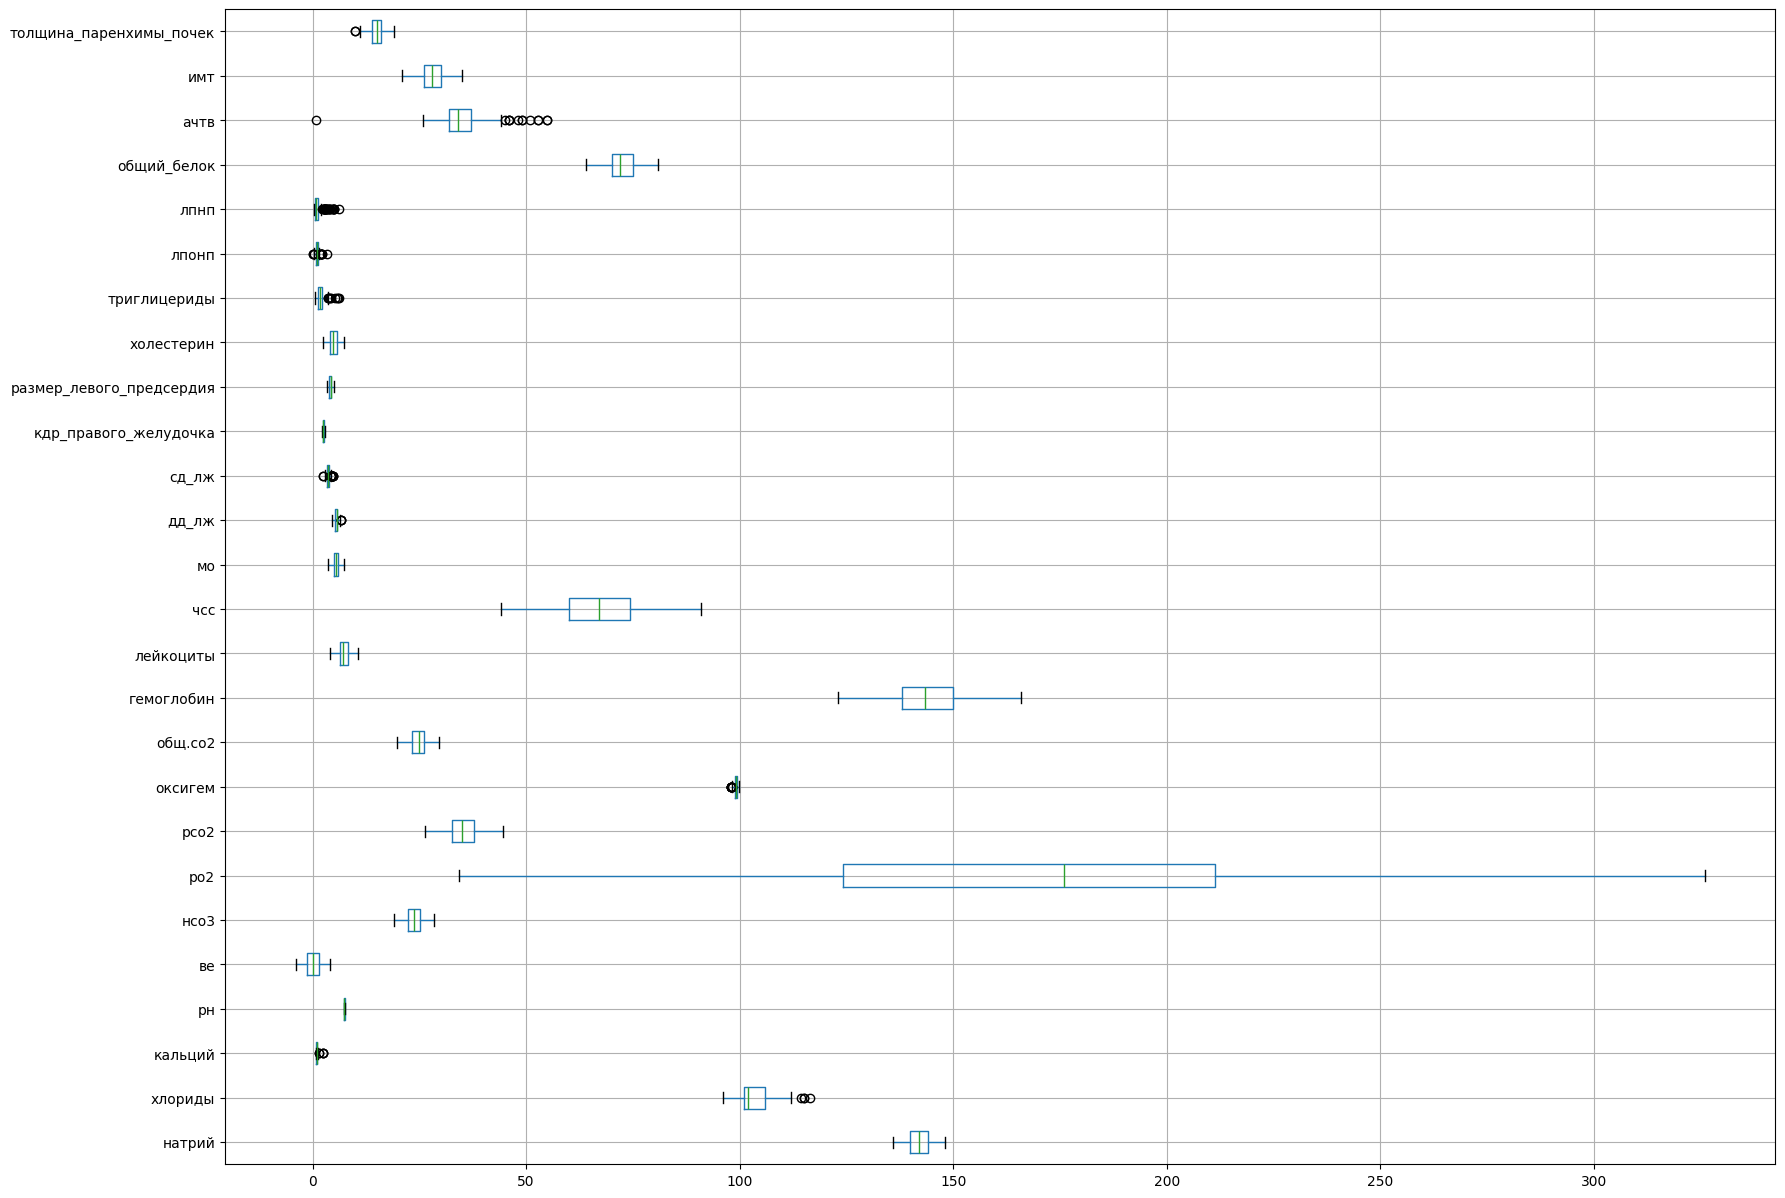

In [289]:
data.boxplot(column=numerical_columns[len(numerical_columns)//2:], vert=False, figsize=(20, 15))
None

В признаке "ачтв" присутствует огромный выброс снизу со значением 0, который не может быть у живого человека. Заменим его на медиану

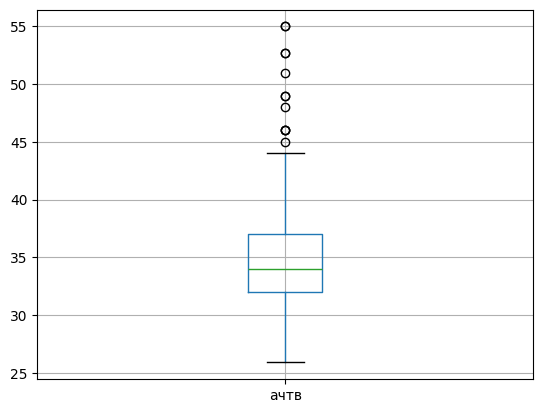

In [290]:
data['ачтв'] = data['ачтв'].replace(data['ачтв'].min(), data['ачтв'].median())
data[['ачтв']].boxplot()
None

## 2.4 Обработать пропуски в данных, обосновать принятое решение по пропускам


Найдем признаки, в которых есть пропуски

In [291]:
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(f"{col} - {data[col].isna().sum()}")

мочевина - 1
хлориды - 23
кальций - 19
триглицериды - 6
лпонп - 10
лпнп - 9
ачтв - 3
толщина_паренхимы_почек - 4


Создадим функцию для дальнейшего заполнения пропусков медианой, используя SimpleImputer

In [292]:
# Распределение признака
def distribution_info(column):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,4))
    sns.histplot(data, x=column, bins=20, kde=True, ax=axs[0])
    sns.boxplot(data, y=column, ax=axs[1])
    plt.suptitle(f"Распределение признака '{column}'", fontsize=16, y=1.01)


# Заполнение пропусков медианой
def fill_median(col):
    imputer = SimpleImputer(strategy='median')
    data_to_impute = data[[col]]
    imputer.fit(data_to_impute)
    imputed_data = imputer.transform(data_to_impute)
    return imputed_data

### Мочевина

В данных присутствует всего 1 пропуск из 200 значений. Можем сделать вывод, что пропуск появился случайно. Критерий важен для прогноза, одно значение не исказит общую картину

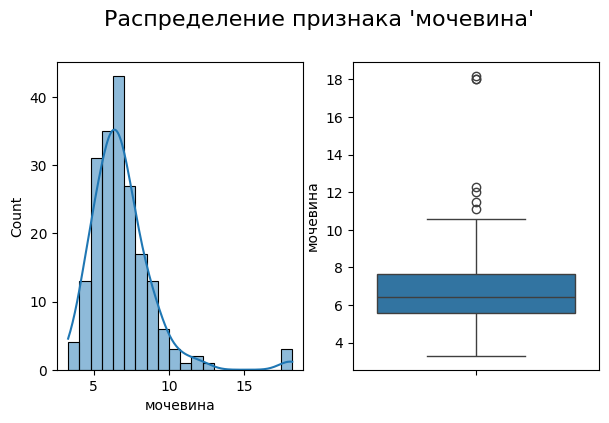

In [293]:
data.dropna(subset=['мочевина'], inplace=True)
distribution_info('мочевина')

### Хлориды

Поскольку пропущено 23 значений, нельзя точно сказать, что данные были потеряны из-за чистой случайности. Заполняем пропуски медианой, поскольку удаление пропусков приведет к потере свыше 10% информации

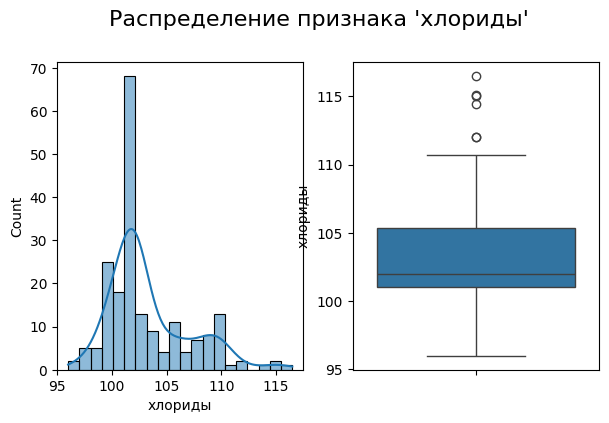

In [294]:
data['хлориды'] = fill_median('хлориды')
data['хлориды'].isna().sum()

distribution_info('хлориды')

### Кальций

Поскольку даных мало, то удаление 19 пропусков приведет к потере большой части информации, поэтому заполним медианой

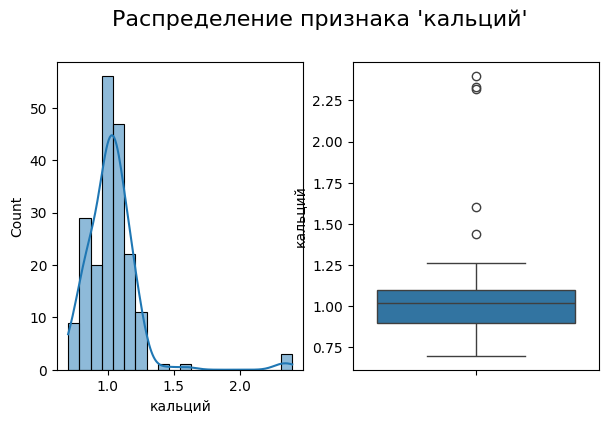

In [295]:
data['кальций'] = fill_median('кальций')
data['кальций'].isna().sum()

distribution_info('кальций')

### Триглицериды

Пропусков - 6. Поскольку признак не важен для предсказания, удаление небольшого количества пропусков не должно исказить данные

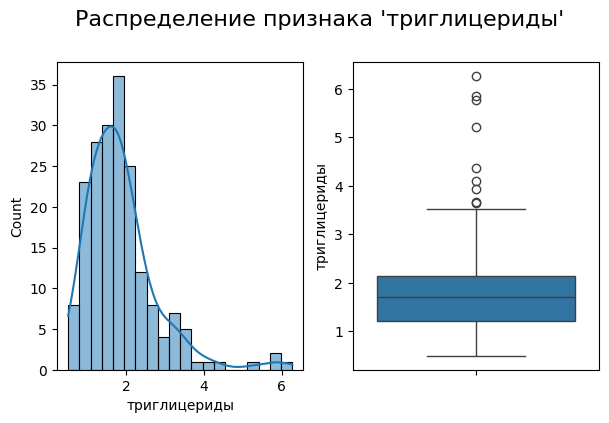

In [296]:
data.dropna(subset=['триглицериды'], inplace=True)
distribution_info('триглицериды')

### ЛПНП - липопротеины низкой плотности


Удаление 9 пропусков может способствовать потере важной части информации. Заполним значение медианой

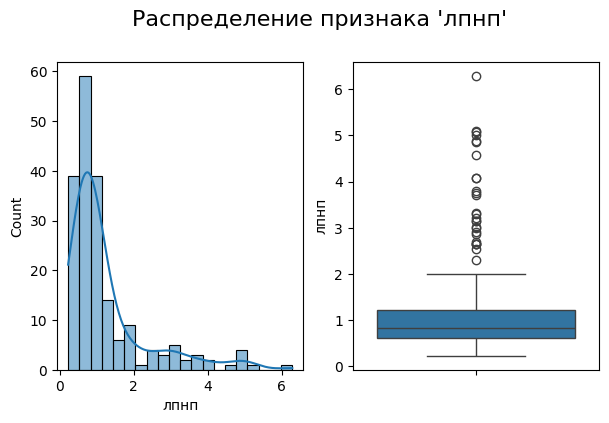

In [297]:
data['лпнп'] = fill_median('лпнп')
distribution_info('лпнп')

### ЛПОНП - липопротеи́ны о́чень ни́зкой пло́тности

Удаление 10 пропусков может привести к потере свыше 5% информации. Заполним медианой

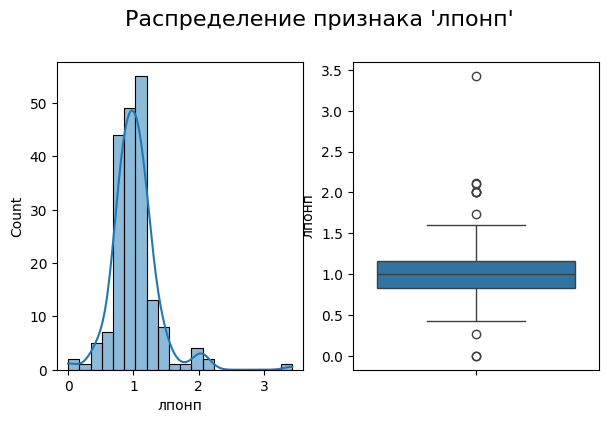

In [298]:
data['лпонп'] = fill_median('лпонп')
distribution_info('лпонп')

### АЧТВ - показатель свертываемости крови

Данные этого фактора относятся к данным результатов анализа, их отсутствие скорее всего может быть причиной случайной ошибкой, о чем говорит чрезвычайно малое количество пропусков (4/200). Удалим их

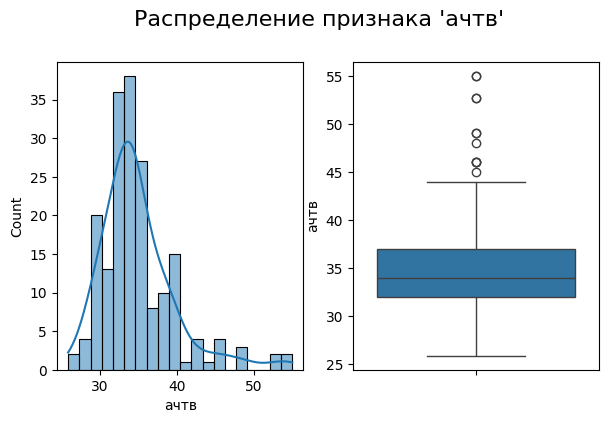

In [299]:
data.dropna(subset=['ачтв'], inplace=True)
distribution_info('ачтв')

### Толщина паренхимы почек

Количество пропусков может говорить о том, что данные были потеряны по случайности (4/200). Поскольку признак крайне важен для прогноза, заполнение пропусков медианой может исказить итоговую точность модели, поэтому удалим пропуски

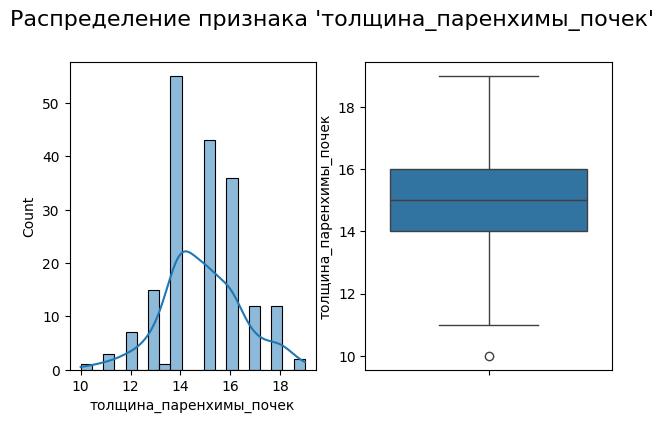

In [300]:
data.dropna(subset=['толщина_паренхимы_почек'], inplace=True)
distribution_info('толщина_паренхимы_почек')

Проверяем данные на пропуски

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 199
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   развитие_опп                 187 non-null    object 
 1   хбп                          187 non-null    object 
 2   возраст                      187 non-null    int64  
 3   пол                          187 non-null    int64  
 4   гб                           187 non-null    int64  
 5   сахарный_диабет              187 non-null    int64  
 6   стенокардия                  187 non-null    int64  
 7   инфаркт_миокарда             187 non-null    int64  
 8   мерцательная_аритмия         187 non-null    int64  
 9   желудочковая_экстрасистолия  187 non-null    int64  
 10  а-в_блокада                  187 non-null    int64  
 11  блокада_ножек_пучка_гиса     187 non-null    int64  
 12  сад                          187 non-null    float64
 13  дад                      

## 2.5 Проверить явные дубликаты

Посмотрим на дубликаты

In [302]:
duplicate_index = data[data.duplicated() == True]
duplicate_index

развитие_опп               хбп  возраст  пол  гб  сахарный_диабет  \
115         есть  Пациенты без ХБП       59    1   1                0   

     стенокардия  инфаркт_миокарда  мерцательная_аритмия  \
115            1                 1                     1   

     желудочковая_экстрасистолия  ...  толщина_паренхимы_почек  аик  \
115                            0  ...                     18.0    1   

     количество_шунтов  длительность_операции  длительность_аик  \
115                  1                  240.0             163.0   

     время_пережатия_аорты  объем_кровопотерии  объем_гемотрансфузии  \
115                   96.0               700.0                1148.0   

     объем_инфузий  диурез  
115         1100.0  1300.0  

[1 rows x 67 columns]

Был найден только 1 дубликат с индексом 115. Удалим его

In [303]:
duplicate_index = duplicate_index.index[0]

data = data.drop(index=duplicate_index, axis=1)
data.shape

(186, 67)

## 2.6 Сформировать дополнительный столбец с данными по пациентам, прооперированным с использованием АИК, которым проводилось переливание крови


In [304]:
data["аик_с_переливанием_крови"] = data.apply(
    lambda x: int((x["аик"] == 1) & (x["объем_гемотрансфузии"] > 0)), axis=1
)
data[['аик', 'объем_гемотрансфузии', 'аик_с_переливанием_крови']].head(5)

аик  объем_гемотрансфузии  аик_с_переливанием_крови
0    0                 830.0                         0
1    1                 640.0                         1
2    0                   0.0                         0
3    1                1283.0                         1
4    1                1560.0                         1

## 2.7 Провести аналитический и графический анализ данных

### Категориальные признаки

In [305]:
categorial_columns = binary_columns + ["хбп"]
len(categorial_columns)

14

In [306]:
df = data.copy()
df = df.replace({cat: {0: 'нет', 1: 'есть'} for cat in categorial_columns})
df = df.replace({'пол': {'нет': 'жен', 'есть': 'муж'}})
df.head(5)

развитие_опп               хбп  возраст  пол    гб сахарный_диабет  \
0          нет      Стадия C1-C2       67  муж  есть            есть   
1         есть      Стадия C1-C2       69  муж  есть             нет   
2          нет  Пациенты без ХБП       50  муж  есть             нет   
3          нет      Стадия C1-C2       62  муж  есть             нет   
4         есть      Стадия C1-C2       55  муж  есть            есть   

  стенокардия инфаркт_миокарда мерцательная_аритмия  \
0        есть             есть                  нет   
1        есть              нет                  нет   
2        есть             есть                  нет   
3        есть             есть                 есть   
4        есть             есть                  нет   

  желудочковая_экстрасистолия  ...   аик количество_шунтов  \
0                         нет  ...   нет                 1   
1                         нет  ...  есть                 4   
2                         нет  ...   нет                 1   
3                         нет  ...  есть                 3   
4                         нет  ...  есть                 3   

   длительность_операции  длительность_аик  время_пережатия_аорты  \
0                  150.0               0.0                    0.0   
1                  235.0             143.0                   48.0   
2                  210.0               0.0                    0.0   
3                  210.0              71.0                   43.0   
4                  265.0             116.0                   74.0   

   объем_кровопотерии  объем_гемотрансфузии  объем_инфузий  диурез  \
0               200.0                 830.0         1200.0   900.0   
1               600.0                 640.0          900.0   800.0   
2               250.0                   0.0         1800.0   500.0   
3               500.0                1283.0         1700.0  1700.0   
4               500.0                1560.0         1800.0  1300.0   

   аик_с_переливанием_крови  
0                         0  
1                         1  
2                         0  
3                         1  
4                         1  

[5 rows x 68 columns]

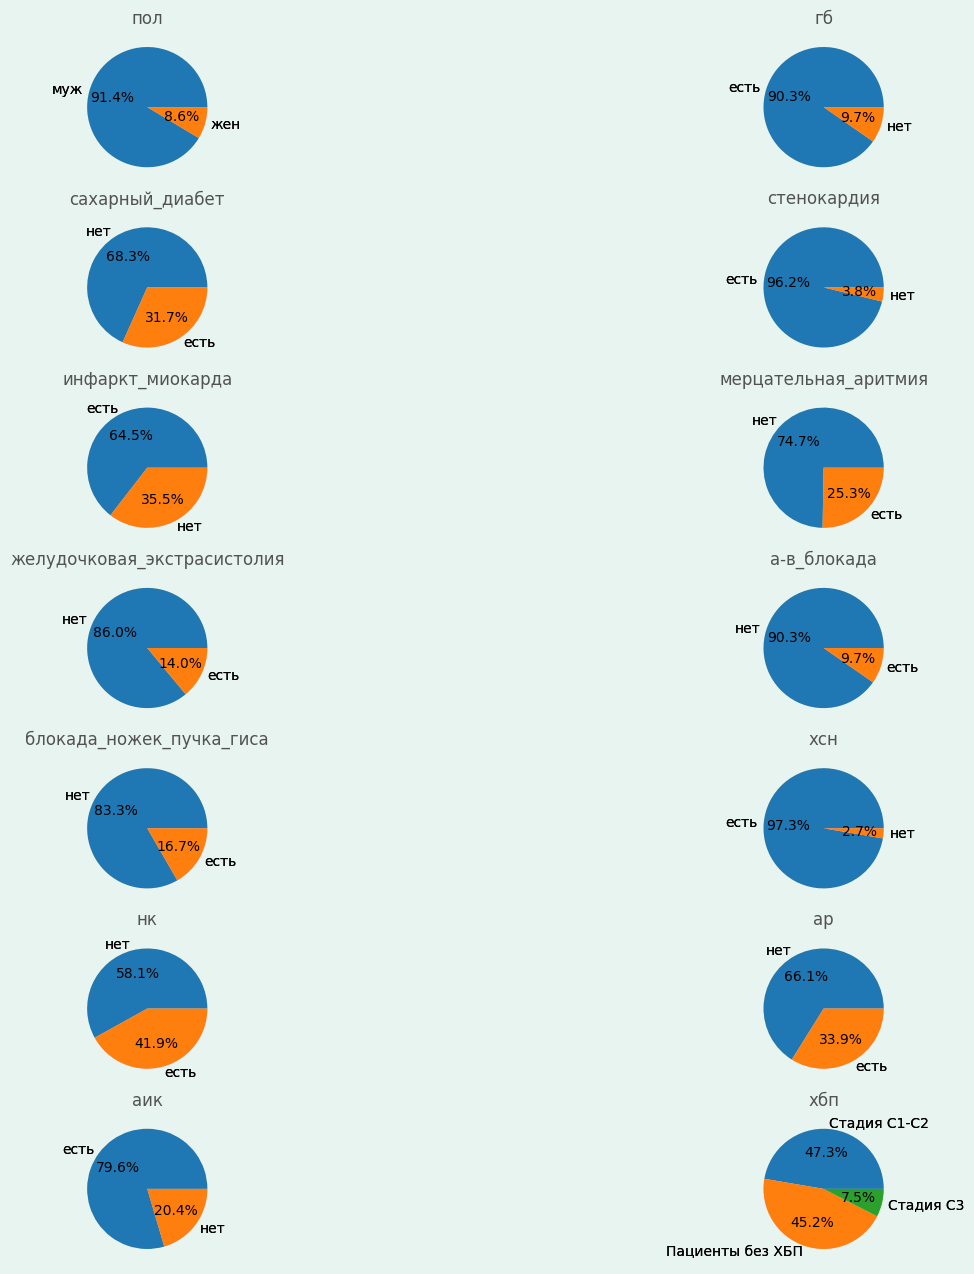

In [307]:
fig, axs = plt.subplots(7, 2, figsize=(16, 16), facecolor="#e8f4f0")
colors = ["#f7ecb0", "#ffb3e6", "#99ff99", "#66b3ff", "#c7b3fb", "#ff6666", "#f9c3b7"]

for ind, cat in enumerate(categorial_columns):
    ax = axs[ind // 2, ind % 2]

    values = df[cat].value_counts()
    labels = values.index.to_list()

    ax.pie(
        values,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
    )
    ax.pie(values, labels=labels)
    font_color = "#525252"
    ax.set_title(cat, fontsize=12, color=font_color)

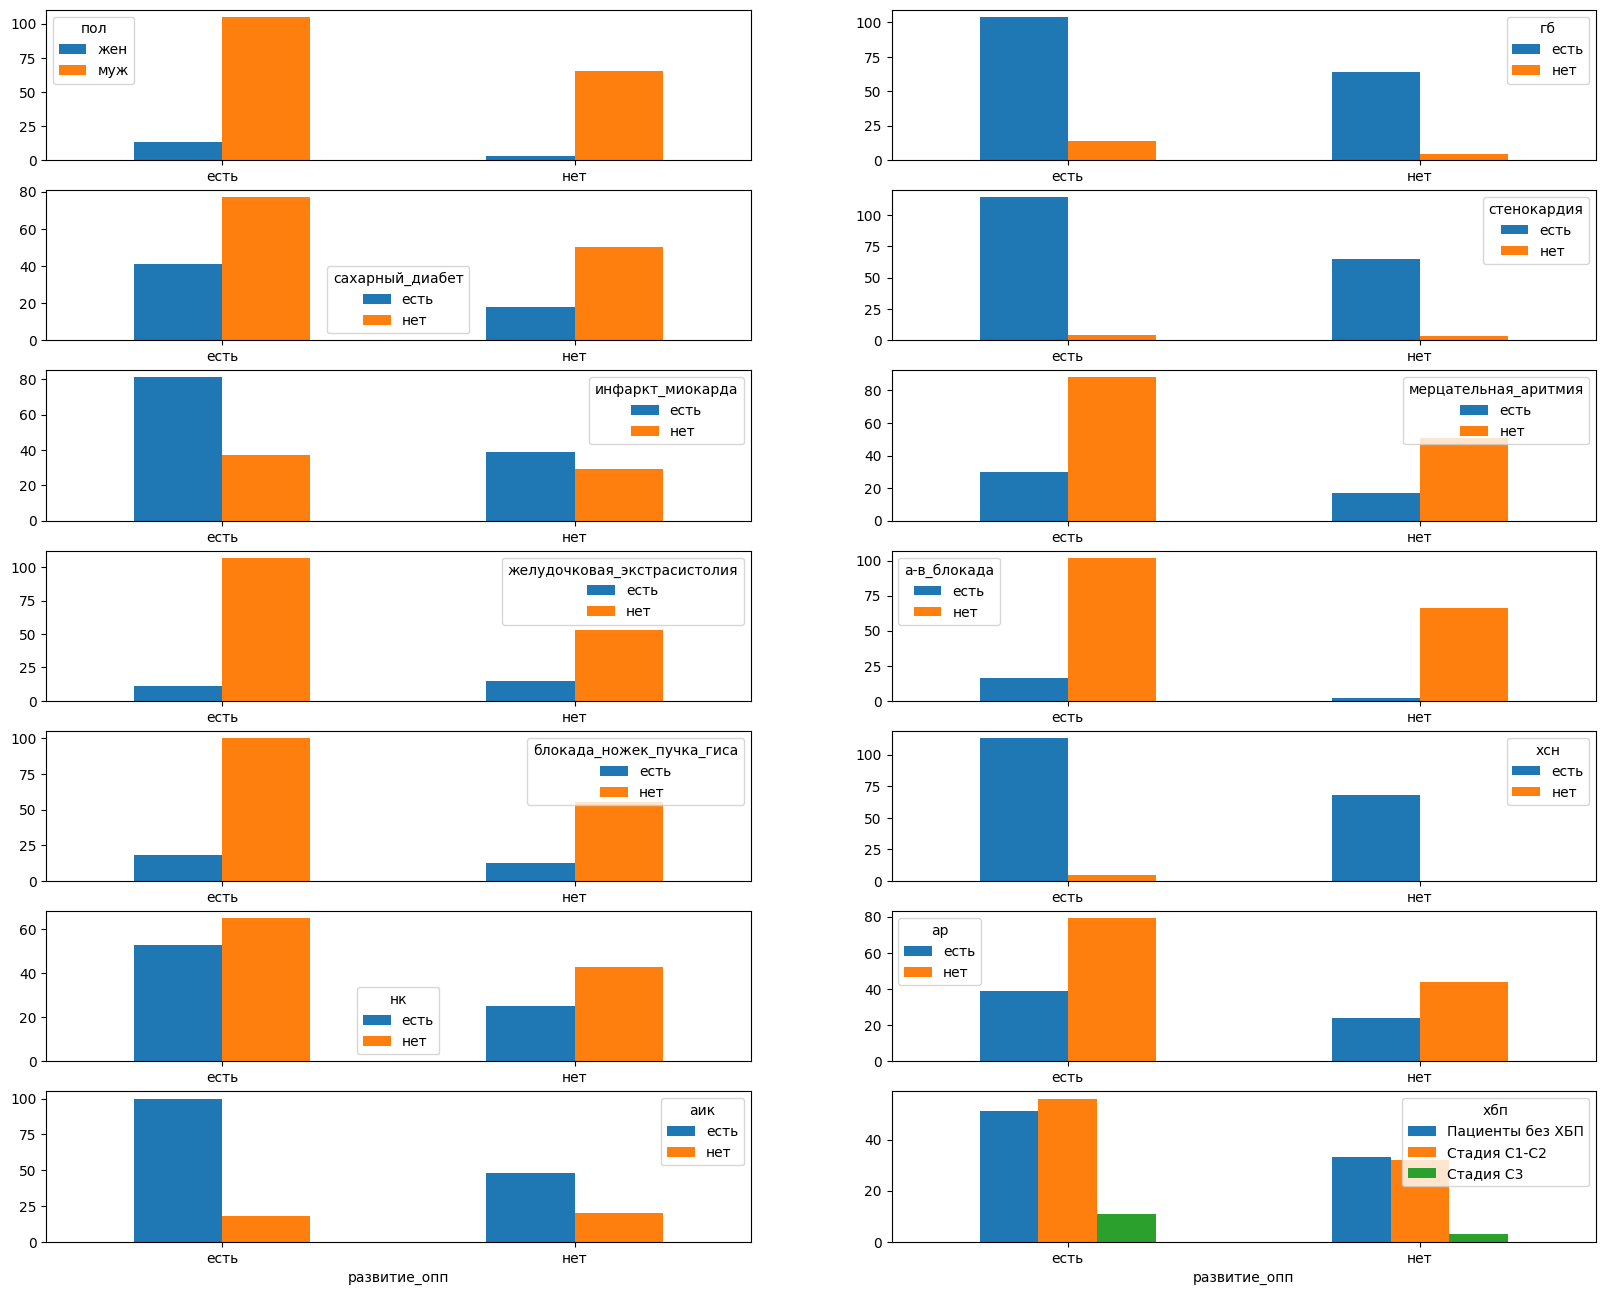

In [308]:
fig, axs = plt.subplots(7, 2, figsize=(20, 16))

for ind, cat in enumerate(categorial_columns):
    row, col = ind // 2, ind % 2
    crosstab = pd.crosstab(index=df["развитие_опп"], columns=df[cat])
    crosstab.plot.bar(rot=0, ax=axs[row, col])

### Числовые признаки

In [309]:
len(numerical_columns)

52

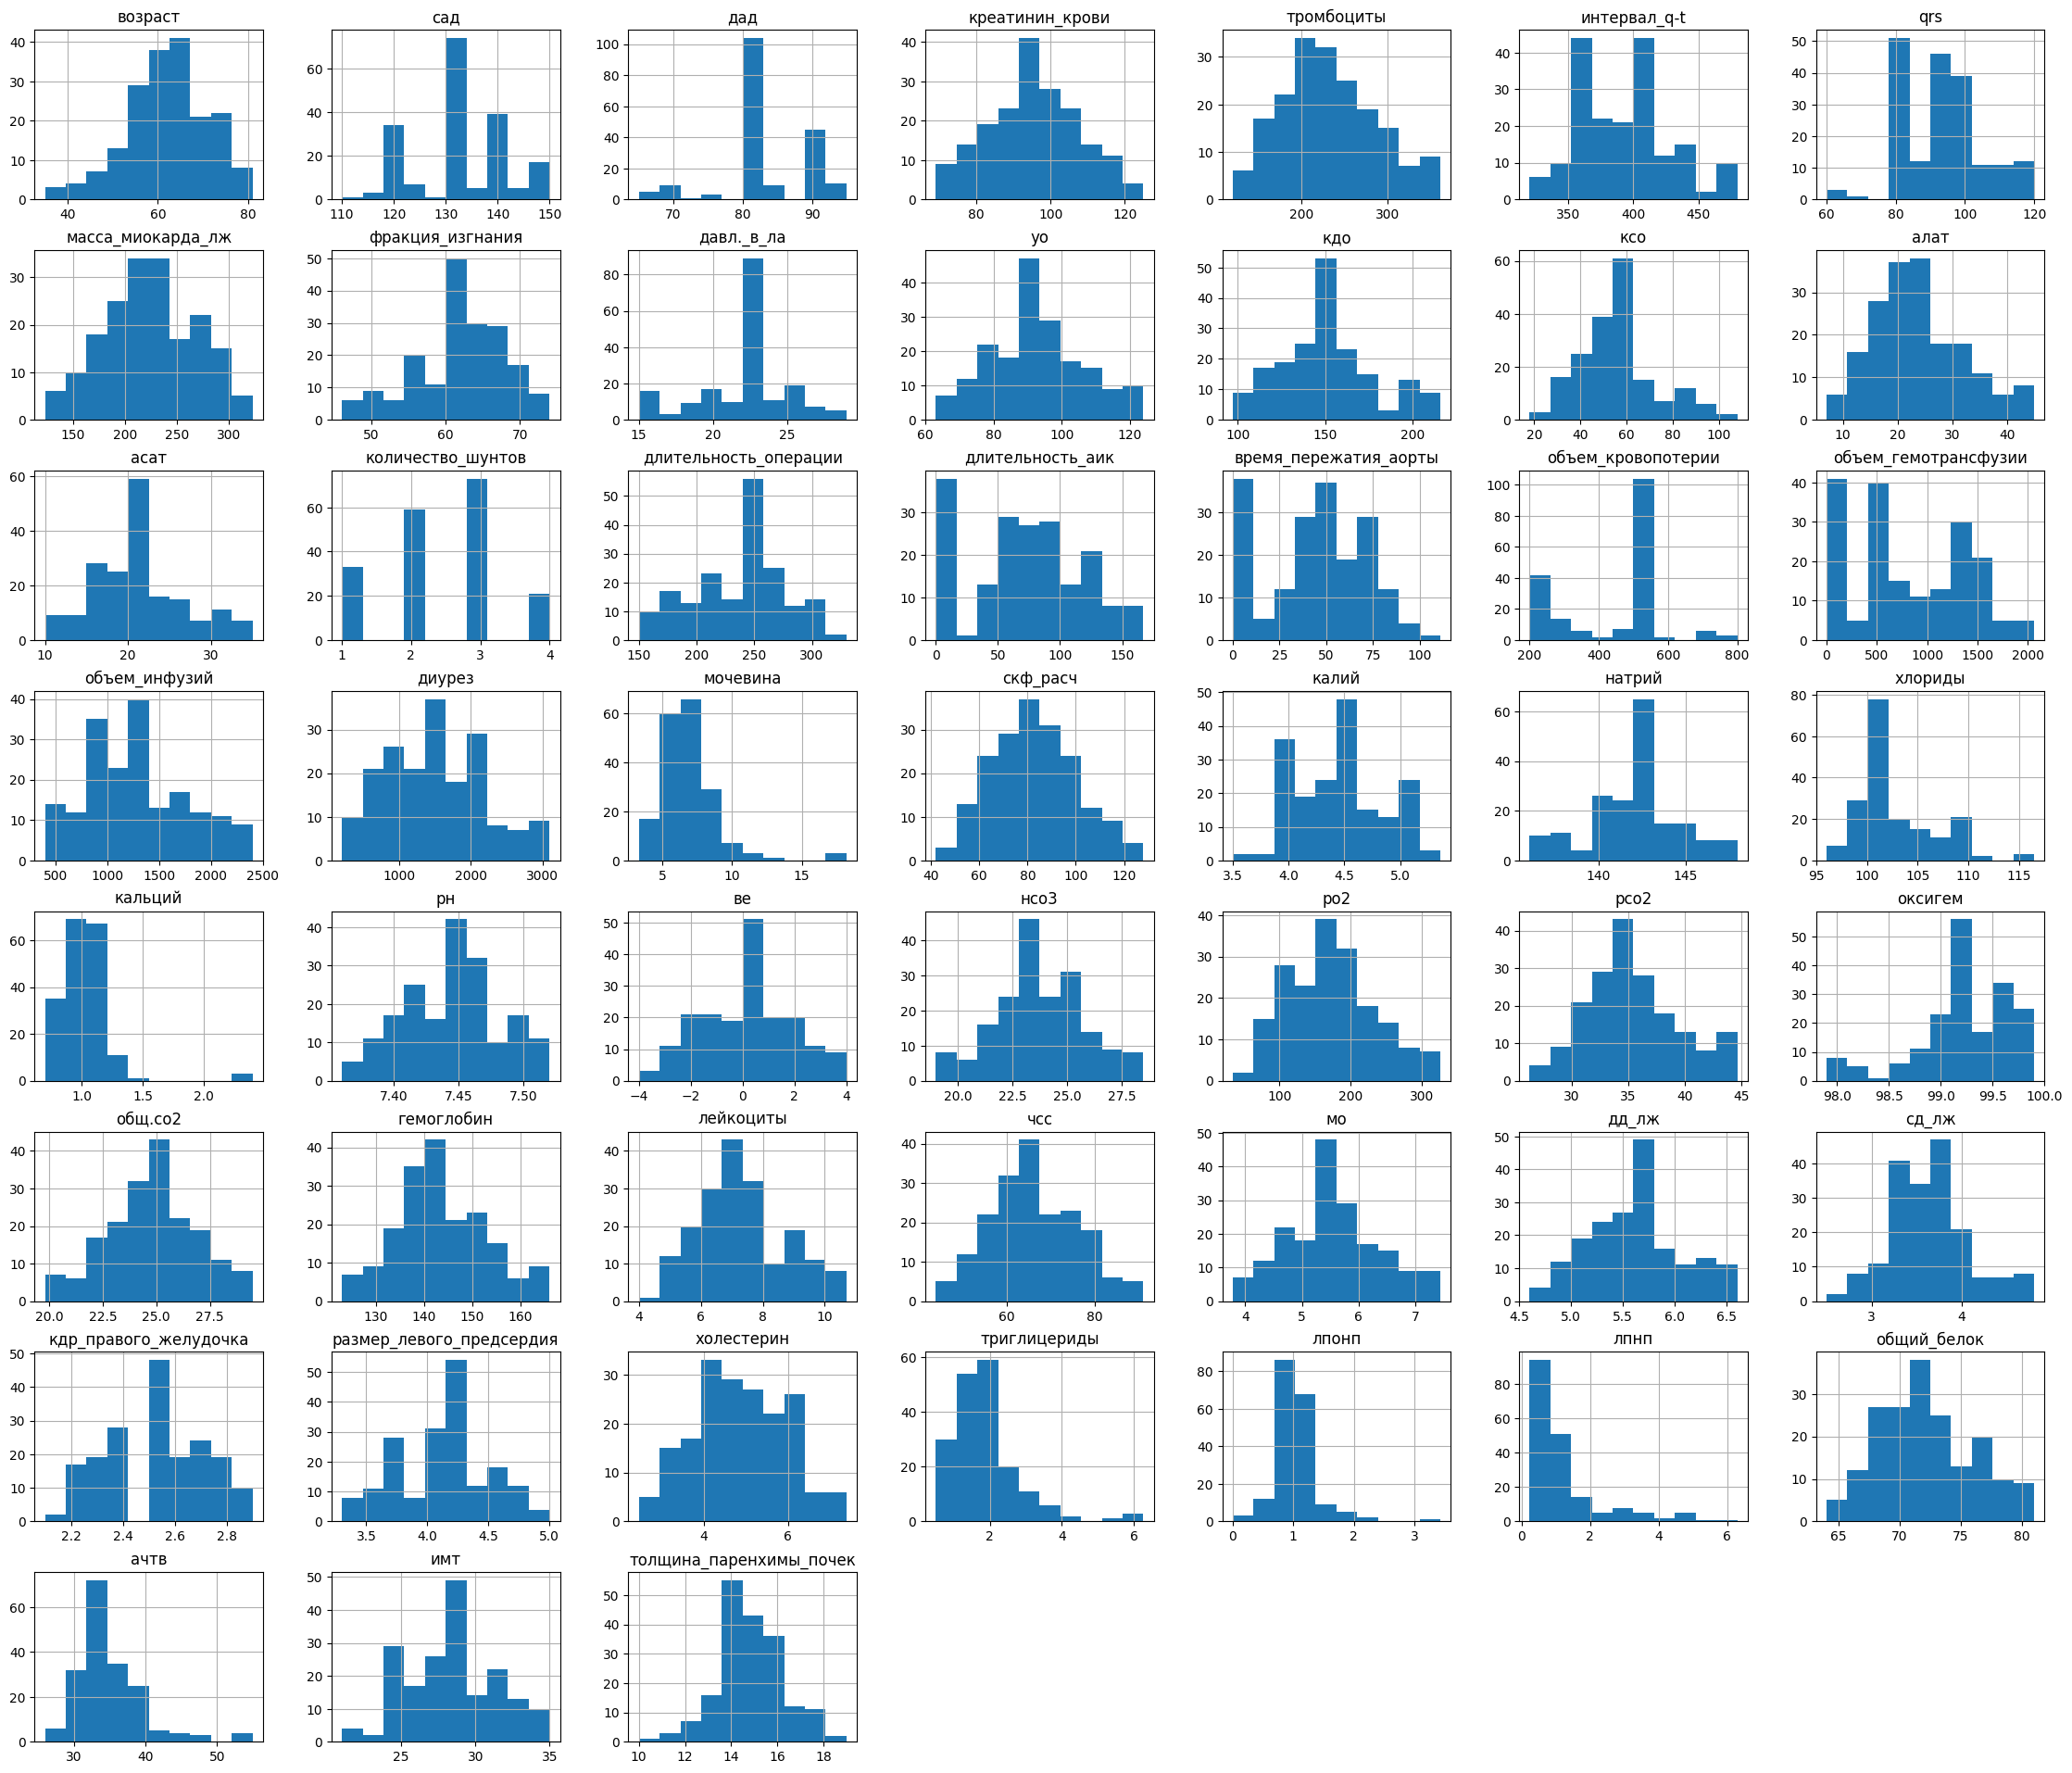

In [310]:
data.hist(column=numerical_columns, figsize=(28, 24))
None

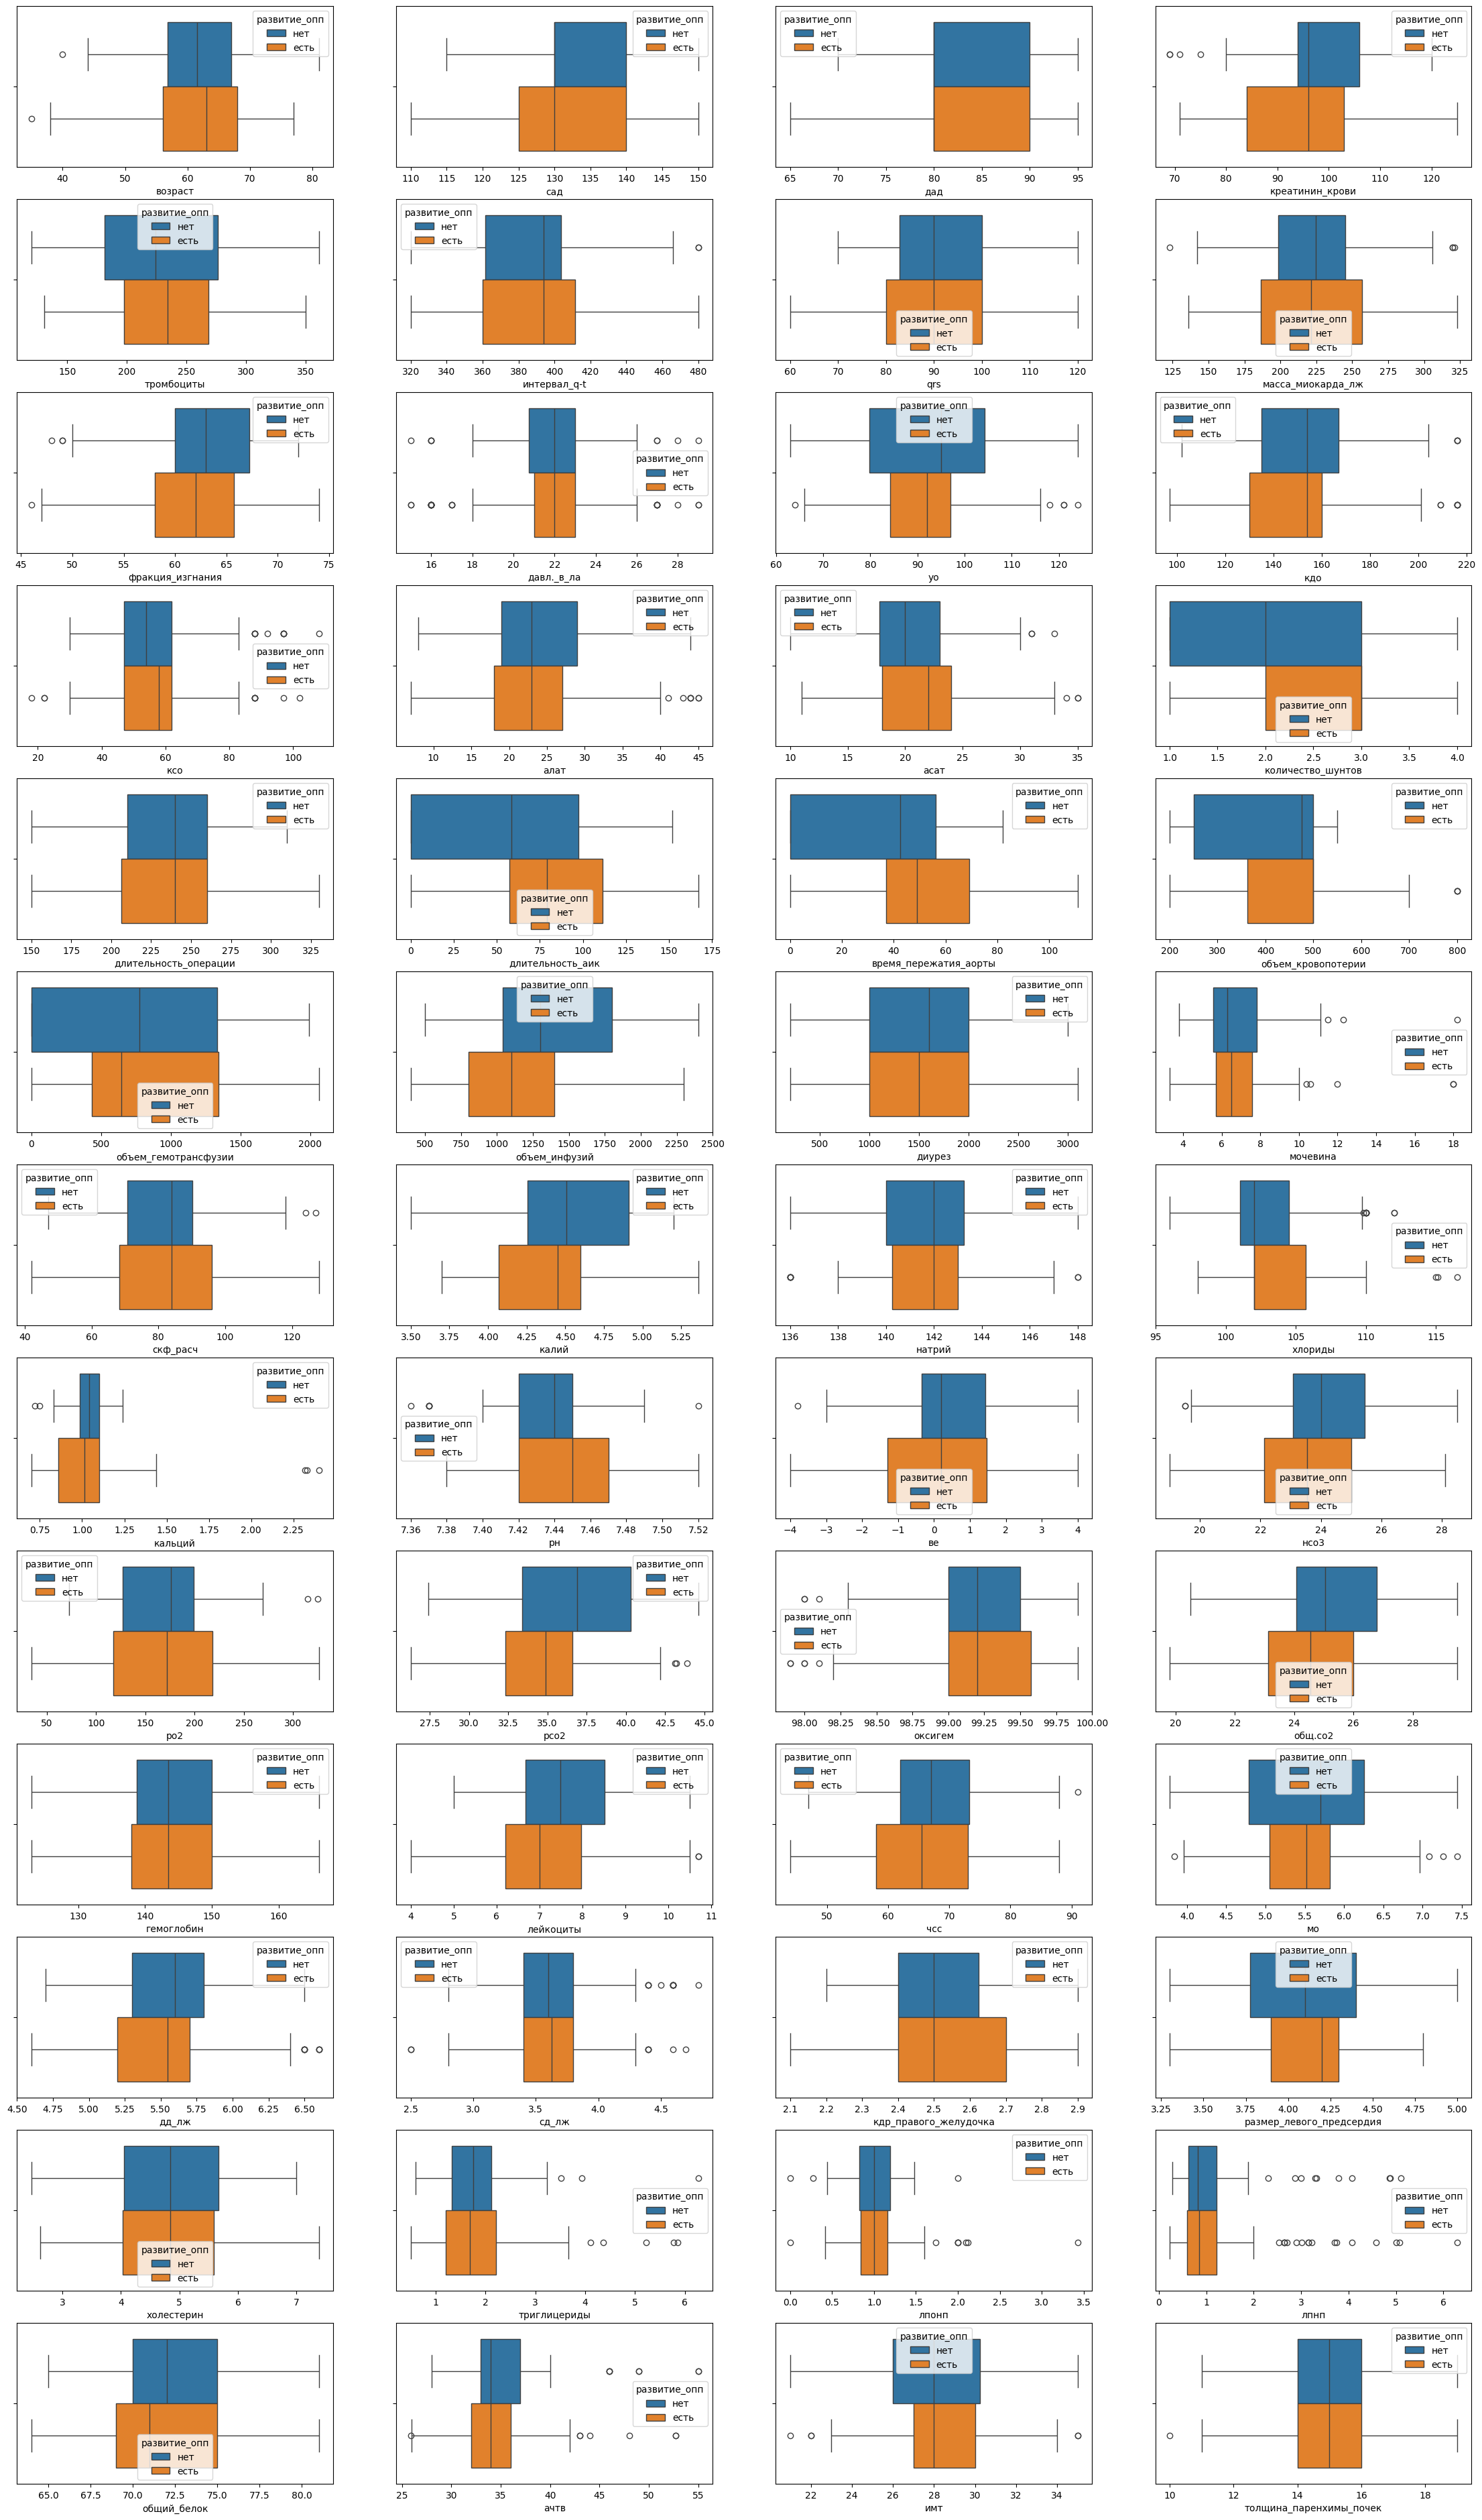

In [311]:
fig, axs = plt.subplots(13, 4, figsize=(28, 48))

for ind, cat in enumerate(numerical_columns):
    row, col = ind // 4, ind % 4
    sns.boxplot(data, x=cat, hue='развитие_опп', ax=axs[row, col])

## Сохранение результатов

In [312]:
data.to_csv('processed_data.csv', index=False, encoding='utf-8')

# 3. Проведение расчётов и исследований



In [313]:
import itertools
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

## Загрузка обработанных данных

In [314]:
data = pd.read_csv("content/processed_data.csv")
data.head()

развитие_опп               хбп  возраст  пол  гб  сахарный_диабет  \
0          нет      Стадия C1-C2       67    1   1                1   
1         есть      Стадия C1-C2       69    1   1                0   
2          нет  Пациенты без ХБП       50    1   1                0   
3          нет      Стадия C1-C2       62    1   1                0   
4         есть      Стадия C1-C2       55    1   1                1   

   стенокардия  инфаркт_миокарда  мерцательная_аритмия  \
0            1                 1                     0   
1            1                 0                     0   
2            1                 1                     0   
3            1                 1                     1   
4            1                 1                     0   

   желудочковая_экстрасистолия  ...  аик  количество_шунтов  \
0                            0  ...    0                  1   
1                            0  ...    1                  4   
2                            0  ...    0                  1   
3                            0  ...    1                  3   
4                            0  ...    1                  3   

   длительность_операции  длительность_аик  время_пережатия_аорты  \
0                  150.0               0.0                    0.0   
1                  235.0             143.0                   48.0   
2                  210.0               0.0                    0.0   
3                  210.0              71.0                   43.0   
4                  265.0             116.0                   74.0   

   объем_кровопотерии  объем_гемотрансфузии  объем_инфузий  диурез  \
0               200.0                 830.0         1200.0   900.0   
1               600.0                 640.0          900.0   800.0   
2               250.0                   0.0         1800.0   500.0   
3               500.0                1283.0         1700.0  1700.0   
4               500.0                1560.0         1800.0  1300.0   

   аик_с_переливанием_крови  
0                         0  
1                         1  
2                         0  
3                         1  
4                         1  

[5 rows x 68 columns]

## 3.1 Посчитать процент пациентов с хроническими заболеваниям (сахарный диабет, гипертония, хроническая болезнь почек) для групп “есть ОПП/нет ОПП”

Введем функцию для расчета процентов пациентов с хроническими заболеваниями

In [315]:
def count_percentage(category: str, temp_df: pd.DataFrame):
    '''
        category - название колонки, процент которой будет вычисляться
        temp_df - временный датасет только с двумся колонками: развитие_опп, одина из ['сахарный_диабет', 'гб', 'наличие_хбп']
    '''

    # преобразование датасета, чтобы остались только те, у кого есть хроническое заболевание
    temp_df[category] = temp_df[category].apply(lambda x: 1 if x == 1 else np.NaN)
    temp_df = temp_df.dropna(axis=0)

    # подсчёт количества пациентов, которые имеют/не имеют ОПП
    data = temp_df.groupby(['развитие_опп']).agg({category: 'count'})

    # высчитывание процента пациентов, которые имеют/не имеют ОПП
    answer = [category]
    summ = sum(list(data[category]))
    for en, j in enumerate(data[category]):
        answer.append(f'{list(data[category].index)[en]} ОПП - {round(j / summ * 100, 2)}%')

    '''
        возвращаем список, который содержит следующую информацию:
        answer[0] - название хронической болезни
        answer[1] - процент пациентов, которые болеют хронически и имеют ОПП
        answer[2] - процент пациентов, которые болеют хронически, но не имеют ОПП
    '''
    return answer

Закодируем признак хбп: есть/нет - 1/0

In [316]:
warnings.filterwarnings('ignore')
data['наличие_хбп'] = data['хбп'].apply(lambda x: 0 if x == 'Пациенты без ХБП' else 1)
data['наличие_хбп'].value_counts()

наличие_хбп
1    102
0     84
Name: count, dtype: int64

Проходим циклом по всем необходимым хроническим болезням

In [317]:
for categ in ['сахарный_диабет', 'гб', 'наличие_хбп']:
    ans = count_percentage(categ, data[[categ, 'развитие_опп']])
    print(ans[0])
    print(ans[1], ans[2], sep='\n')
    print()

сахарный_диабет
есть ОПП - 69.49%
нет ОПП - 30.51%

гб
есть ОПП - 61.9%
нет ОПП - 38.1%

наличие_хбп
есть ОПП - 65.69%
нет ОПП - 34.31%



## 3.2 Ввести новый фактор (описать и обосновать выбор фактора и его значений) на основе столбца “Индекс массы тела”.  Посчитать количество пациентов, имеющих проблемы с сердцем (выбор перечня проблем должен быть описан и обоснован) для каждой группы. Сделать вывод

Для столбца "Индекс массы тела" был введен новый фактор "имт_группа". Этот параметр выбран в соответствии с рекомендациями Всемирной организации здравоохранения (ВОЗ) и базируется на следующей интерпретации значений ИМТ[2]:

|Индекс массы тела | Соответствие между массой человека и его ростом|
| ----------- | ----------- |
|16 и менее|	Выраженный дефицит массы тела|
|16—18,5|	Недостаточная (дефицит) масса тела|
|18,5—25|	Норма|
|25—30|	Избыточная масса тела (предожирение)|
|30—35|	Ожирение 1 степени|
|35—40|	Ожирение 2 степени|
|40 и более|	Ожирение 3 степени|

(ссылка на статью в Википедии - https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0).

In [318]:
def _bmi_categorizer(bmi: float) -> str:
    if bmi <= 16.0:
        return "Выраженный дефицит массы тела"
    if bmi < 18.5:
        return "Недостаточная (дефицит) масса тела"
    if bmi < 25:
        return "Норма"
    if bmi < 30:
        return "Избыточная масса тела (предожирение)"
    if bmi < 35:
        return "Ожирение 1 степени"
    if bmi < 40:
        return "Ожирение 2 степени"
    return "Ожирение 3 степени"


data['имт_группа'] = data['имт'].apply(_bmi_categorizer).astype(str)
data['имт_группа'].head(5)

0                      Ожирение 1 степени
1    Избыточная масса тела (предожирение)
2                      Ожирение 1 степени
3                      Ожирение 1 степени
4                      Ожирение 1 степени
Name: имт_группа, dtype: object

Перечень сердечных проблемы:
> 1. **гб (Гипортоническая болезнь)** - патология сердца и сосудов, проявляющаяся повышением артериального давления
> 2. **стенокардия** - это болевой синдром в грудной клетке, одно из проявлений ишемической болезни сердца (ИБС)
> 3. **инфаркт_миокарда** - серде́чный при́ступ возникает из-за полной или частичной блокировки артерии, питающей сердце
> 4. **мерцательная_аритмия** - нарушение сердечного ритма, характеризующееся хаотическим, нерегулярным сокращением миокарда
> 5. **желудочковая_экстрасистолия** - нарушение сердечного ритма, характеризующееся хаотическим, нерегулярным сокращением миокарда предсердий
> 6. **а-в_блокада** - частичное или полное прерывание проведения импульса от предсердий к желудочкам. Наиболее частой причиной является идиопатический фиброз или склероз проводящей системы сердца.
> 7. **блокада_ножек_пучка_гиса** - нарушение внутрисердечной проводимости, характеризующееся замедлением или полным прекращением проведения импульсов возбуждения по одной или нескольким ветвям пучка Гиса
> 8. **хсн** (хроническая сердечная недостаточность) - Когда сердце не обеспечивает достаточное кровоснабжение организма, это вызывает отеки и кислородное голодание тканей и внутренних органов.
> 9. **нк** (недостаточность кровообращения) - синдром, вызванный декомпенсированным нарушением функции миокарда (мышечная ткань сердечного типа)
> 10. **аик** (наличие аппарата искусственного кровообращения) - когда серце уже не справляется со своими функциями

In [319]:
heart_problem_columns = [
    "гб",
    "стенокардия",
    "инфаркт_миокарда",
    "мерцательная_аритмия",
    "желудочковая_экстрасистолия",
    "а-в_блокада",
    "блокада_ножек_пучка_гиса",
    "хсн",
    "нк",
    "аик",
]

In [320]:
data["имеет_сердечные_проблемы"] = data[heart_problem_columns].any(axis=1)
bpi_grouped_data = data.groupby(["имт_группа", "имеет_сердечные_проблемы"]).size()
bpi_grouped_data

имт_группа                            имеет_сердечные_проблемы
Избыточная масса тела (предожирение)  True                        109
Норма                                 True                         18
Ожирение 1 степени                    True                         56
Ожирение 2 степени                    True                          3
dtype: int64

Вывод: все пациенты имеют сердечные проблемы так или иначе

## 3.3 Исследовать зависимость длительности операции от факта перенесенного в прошлом инфаркта миокарда


$H_{0}$: Нету связи между фактором перенесенным в прошлом инфарктом миокарда и длительности операции\
$H_{1}$: Есть связь между фактором перенесенным в прошлом инфарктом миокарда и длительности операции

### Графический анализ

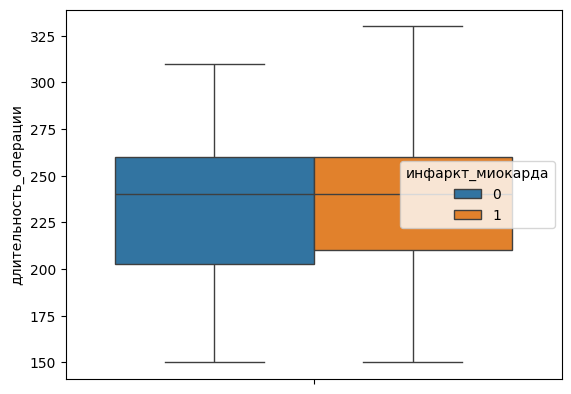

In [321]:
ax = sns.boxplot(y="длительность_операции", hue="инфаркт_миокарда", data=data)

Хотя медиана и интерквартальных размах схожи в обоих "ящиках с усами", у второго графика немного выше первый квартиль и более выражен максимум по сравнению с первой графикой. Это указывает, что в целом распределение данных во втором графике смещено немного вверх, но на основе этого нельзя сделать вывод о зависимости длительности операции от факта перенесенного в прошлом инфаркта миокарда.

### Аналитический анализ

In [322]:
def check_normality(data):
    _, p_value_normality = stats.shapiro(data)
    if p_value_normality <= 0.05:
        print("Данные распределены ненормально")
    else:
        print("Данные распределены нормально")

check_normality(data['длительность_операции'])

Данные распределены ненормально


Шкала у фактора "инфаркт_миокарда" бинарный (номинальный), шкала у отклика "длительность_операции" количественный (ненормальная), поэтому используем **U-критерий Манна-Уитни**

In [323]:
group1 = data[data["инфаркт_миокарда"] == 0]["длительность_операции"]
group2 = data[data["инфаркт_миокарда"] == 1]["длительность_операции"]

cor, pvalue = stats.mannwhitneyu(group1, group2)
round(pvalue, 2)

0.97

При таком уровне значимости, можно сказать что нету связи между перенесенным в прошлом инфарктом миокарда и длительностью операции

## 3.4 Верно ли, что у пациентов с ИМТ выше нормы будет повышенный уровень холестерина?


Согласно ВОЗ, избыточная масса тела начинается с 25 ИМТ

|Индекс массы тела | Соответствие между массой человека и его ростом|
| ----------- | ----------- |
|18,5—25|	Норма|
|25—30|	Избыточная масса тела (предожирение)|
|30—35|	Ожирение 1 степени|
|35—40|	Ожирение 2 степени|
|40 и более|	Ожирение 3 степени|

In [324]:
high_imt = data[data["имт"] >= 25]
low_imt = data[data["имт"] < 25]

print(f'ИМТ ниже нормы - уровень холестерина {round(low_imt["холестерин"].mean(), 2)}')
print(f'ИМТ выше нормы -  уровень холестерина {round(high_imt["холестерин"].mean(), 2)}')

ИМТ ниже нормы - уровень холестерина 4.93
ИМТ выше нормы -  уровень холестерина 4.84


Предположение о том, что у пациентов с ИМТ выше нормы будет повышенный уровень холестирина оказалось неверным. У пациентов с ИМТ выше нормы уровень холестирина ниже чем у пациентов с ИМТ ниже нормы

## 3.5 Верно ли, что даже без хронических болезней почек с возрастом толщина паренхимы почек уменьшается?

Данные о возрасте и толщине паренхимы почек пациентов, у которых нет хронической болезни почек

In [325]:
without_chronic_kidney = data[data["хбп"] == "Пациенты без ХБП"][['возраст', 'толщина_паренхимы_почек']]
without_chronic_kidney.head(5)

возраст  толщина_паренхимы_почек
2        50                     17.0
5        60                     19.0
11       60                     16.0
12       57                     15.0
16       40                     15.0

На основе дынных возраста введем новый признак в виде возрастной группы

In [326]:
def _age_categorizer(age: int) -> str:
    if 10 <= age < 20:
        return "10-20"
    elif 20 <= age < 30:
        return "20-30"
    if 30 <= age < 40:
        return "30-40"
    elif 40 <= age < 50:
        return "40-50"
    elif 50 <= age < 60:
        return "50-60"
    elif 60 <= age < 70:
        return "60-70"
    elif 70 <= age < 80:
        return "70-80"
    elif 80 <= age < 90:
        return "80-90"

without_chronic_kidney['возрастная_группа'] = without_chronic_kidney['возраст'].apply(_age_categorizer)
without_chronic_kidney.head(5)

возраст  толщина_паренхимы_почек возрастная_группа
2        50                     17.0             50-60
5        60                     19.0             60-70
11       60                     16.0             60-70
12       57                     15.0             50-60
16       40                     15.0             40-50

Выводим средние значения толщины паренхимы почек среди возрастных групп

In [327]:
average_thickness_by_age = without_chronic_kidney.groupby("возрастная_группа")["толщина_паренхимы_почек"].mean().round(1)
average_thickness_by_age

возрастная_группа
30-40    16.7
40-50    15.5
50-60    15.4
60-70    15.2
70-80    15.1
Name: толщина_паренхимы_почек, dtype: float64

Утверждение, что с возрастом толщина паренхимы почек уменшаеться, оказалось неверным.

## 3.6 Проверить адекватность поставленного диагноза по стадии хронической болезни почек (найти параметр, по которому ставится диагноз, использовать данные из внешних источников)

Создаем функции для постановки стадии хбп у пациента и для проверки адекватности поставленного диагноза

In [328]:
# Устанавливаем стадию хбп у пациента
def make_prediction_to_diagnosis(skf):
    if g1[0] <= skf <= g1[1]:
        return "Стадия C1-C2"
    elif g2[1] < skf < g1[0]:
        return "Стадия C1-С2"
    elif skf <= g2[1]:
        return "Стадия C3"
    return "Пациенты без ХБП"


# Проверяем адекватность поставленного диагноза
def check_diagnosis(cols):
    vals = cols.values
    if vals[0] == vals[1]:
        return "Диагноз поставлен правильно"
    return "Диагноз возможно поставлен некорректно"

Удаляем всех пациентов у которых нет острого поражения почек

In [329]:
pred_data = data[['развитие_опп', 'хбп', 'скф_расч']]
pred_data = pred_data[pred_data['развитие_опп'] == 'есть']
pred_data

развитие_опп               хбп  скф_расч
1           есть      Стадия C1-C2      63.0
4           есть      Стадия C1-C2      95.0
6           есть      Стадия C1-C2      61.0
8           есть      Стадия C1-C2      80.0
10          есть      Стадия C1-C2      75.0
..           ...               ...       ...
172         есть      Стадия C1-C2      93.0
176         есть  Пациенты без ХБП      58.0
181         есть      Стадия C1-C2      99.0
182         есть      Стадия C1-C2      96.0
183         есть      Стадия C1-C2      61.0

[118 rows x 3 columns]

Узнаем примерные рамки параметра скф по поставленной стадии

In [330]:
d = round(pred_data.groupby(['хбп']).agg({'скф_расч': 'describe'})['скф_расч'], 2)
twenty_five = d['25%'].values
mean = d['mean'].values
seventy_five = d['75%'].values

g1 = [twenty_five[0], seventy_five[0]]
g2 = [twenty_five[1], seventy_five[1]]

print("25% - {}\nСреднее - {}\n75% - {}".format(twenty_five, mean, seventy_five))

25% - [73.   73.75 53.5 ]
Среднее - [85.47 84.78 59.18]
75% - [97.  96.1 58.5]


Делаем колонку предположительного диагноза


In [331]:
# делаем колонку предположительного диагноза
pred_data['предположительный_диагноз'] = pred_data['скф_расч'].apply(lambda x: make_prediction_to_diagnosis(x))
pred_data.head()

развитие_опп           хбп  скф_расч предположительный_диагноз
1          есть  Стадия C1-C2      63.0                 Стадия C3
4          есть  Стадия C1-C2      95.0              Стадия C1-C2
6          есть  Стадия C1-C2      61.0                 Стадия C3
8          есть  Стадия C1-C2      80.0              Стадия C1-C2
10         есть  Стадия C1-C2      75.0              Стадия C1-C2

Cравниваем колонку преположительного диагноза и хбп.
 - Если диагноз подтверждается: Диагноз поставлен правильно
 - Иначе: Диагноз возможно поставлен некорректно

In [332]:
pred_data['адекватность_диагноза'] = pred_data[['предположительный_диагноз', 'хбп']].apply(lambda x: check_diagnosis(x), axis=1)

pred_data[['адекватность_диагноза', 'хбп']].head(10)

адекватность_диагноза               хбп
1   Диагноз возможно поставлен некорректно      Стадия C1-C2
4              Диагноз поставлен правильно      Стадия C1-C2
6   Диагноз возможно поставлен некорректно      Стадия C1-C2
8              Диагноз поставлен правильно      Стадия C1-C2
10             Диагноз поставлен правильно      Стадия C1-C2
13             Диагноз поставлен правильно      Стадия C1-C2
15  Диагноз возможно поставлен некорректно      Стадия C1-C2
16  Диагноз возможно поставлен некорректно  Пациенты без ХБП
17             Диагноз поставлен правильно      Стадия C1-C2
19             Диагноз поставлен правильно      Стадия C1-C2

## 3.7 Исследовать корреляцию между параметрами. Для наиболее сильных корреляций обосновать, имеет ли это реальный смысл или же просто особенность данных

Введем основные функции для расчета коэффициента корелляции

In [333]:
# Функция для подсчёта корреляции номинальных данных с номинальными
def chi2_counting(first_cat, second_cat):
    temp_table = pd.crosstab(data[first_cat], data[second_cat])
    chi_2 = stats.chi2_contingency(temp_table)
    return chi_2.statistic, chi_2.pvalue


# Функция для подсчёта корреляции количественных данных с номинальными
def mannwhitneyu_counting(first_cat, second_cat):
    mn = stats.mannwhitneyu(first_cat, second_cat)
    cor, p_value = mn.statistic, mn.pvalue
    return cor, p_value


# Функция для подсчёта корреляции количественных данных с количественными (с нормальным распределением данных)
def pearsonr_counting(first_cat, second_cat):
    pr = stats.pearsonr(first_cat, second_cat)
    cor, p_value = pr.statistic, pr.pvalue
    return cor, p_value


# Функция для подсчёта корреляции количественных данных с количественными (с ненормальным распределением данных)
def spearmanr_counting(first_cat, second_cat):
    sp = stats.spearmanr(first_cat, second_cat)
    cor, p_value = sp.statistic, sp.pvalue
    return cor, p_value

In [334]:
nominal = [
    "развитие_опп",
    "пол",
    "гб",
    "сахарный_диабет",
    "стенокардия",
    "инфаркт_миокарда",
    "мерцательная_аритмия",
    "желудочковая_экстрасистолия",
    "а-в_блокада",
    "блокада_ножек_пучка_гиса",
    "хсн",
    "нк",
    "ар",
    "аик",
    "хбп",
    "имт_группа",
]

Проходимся по данным и проводим расчет корелляций

In [335]:
answer = list()

for first_cat, second_cat in itertools.combinations(set(data.columns), 2):
    g1 = data[first_cat]
    g2 = data[second_cat]
    if first_cat in nominal and second_cat in nominal:
        # Вычисление корреляции для номинальные-номинальные
        cor, p_value = chi2_counting(first_cat, second_cat)
        answer.append([first_cat, second_cat, round(cor, 2), round(p_value, 3)])
    elif (
        first_cat in nominal
        and second_cat not in nominal
        or first_cat not in nominal
        and second_cat in nominal
    ):
        # Вычисление корреляции для количественные-номинальные
        try:
            cor, p_value = mannwhitneyu_counting(g1, g2)
            answer.append(
                [first_cat, second_cat, round(cor, 2), round(p_value, 3)]
            )
        except TypeError:
            pass
    else:
        # Вычисление корреляции для количественные-количественные
        if stats.shapiro(g1).pvalue >= 0.05 and stats.shapiro(g2).pvalue >= 0.05:
            # Данные распределены нормально
            cor, p_value = pearsonr_counting(g1, g2)
            answer.append(
                [first_cat, second_cat, round(cor, 2), round(p_value, 3)]
            )
        else:
            # Данные распределены ненормально
            cor, p_value = spearmanr_counting(g1, g2)
            answer.append(
                [first_cat, second_cat, round(cor, 2), round(p_value, 3)]
            )

Фильтруем данные

In [336]:
new_answer = list()
for result in answer:
    if result[-2] != 0 and -1 <= result[-2] <= 1 and result[-1] <= 0.05:
        new_answer.append(result)

In [337]:
answer_df = pd.DataFrame(
    data=sorted(new_answer, key=lambda x: x[-2], reverse=True),
    columns=["Показатель №1", "Показатель №2", "Значение корреляции", "p-уровень"],
)

answer_df.head(5)

Показатель №1          Показатель №2  Значение корреляции  p-уровень
0                уо                     мо                 0.99        0.0
1              нсо3                общ.со2                 0.98        0.0
2             сд_лж                    ксо                 0.93        0.0
3             дд_лж                    кдо                 0.93        0.0
4  длительность_аик  время_пережатия_аорты                 0.89        0.0

p-уровень=0:
Утверждение о том, что корреляции получены неслучайно.

**1. Минутный объём сердца (МО) и Ударный объём сердца (УО)**:\
МО полностью зависит от УО по определению.

**2. Общий уровень углекислого газа (Общ.СО2) и бикарбонат (НСО3)**:\
НСО3 состоит из СО2, поэтому это также особенность данных.

**3. Диастолическая дисфункция левого желудочка (ДД_ЛЖ) и Конечный диастолический объём (КДО):**\
Конечный диастолический объём напрямую зависит от диастолической дисфункции левого желудочка по определению. Корреляция в 0.93, а не 1, может объясняться влиянием других факторов, таких как Систолическая дисфункция левого желудочка (СД_ЛЖ).

**4. Конечный систолический объём (КСО) и Систолическая дисфункция левого желудочка (СД_ЛЖ):**\
Та же причина, что и в предыдущем пункте.

**5. Время пережатия аорты и Длительность аортального искусственного кровообращения (Длительность АИК):**\
При пережатии аорты кровь не циркулирует, что требует наличия аппарата искусственного кровообращения. Почему корреляция равна 0.89, а не 1, возможно, объясняется воздействием других факторов.

# 4. Проверка Гипотез

Проверка гипотез была проведена по алгоритму, представленный в презентации пятого урока*
 1. Определить фактор и отклик
 2. Определить шкалы фактора и отклика
 3. Собрать данные
 4. Выбрать тип графика и провести графический анализ
 5. Выбрать метод проверки гипотезы
 6. Рассчитать статистическую значимость
 7. Сделать окончательный вывод

*При выборе метода мы ориентировались на график, представленный в презентации пятого урока.*

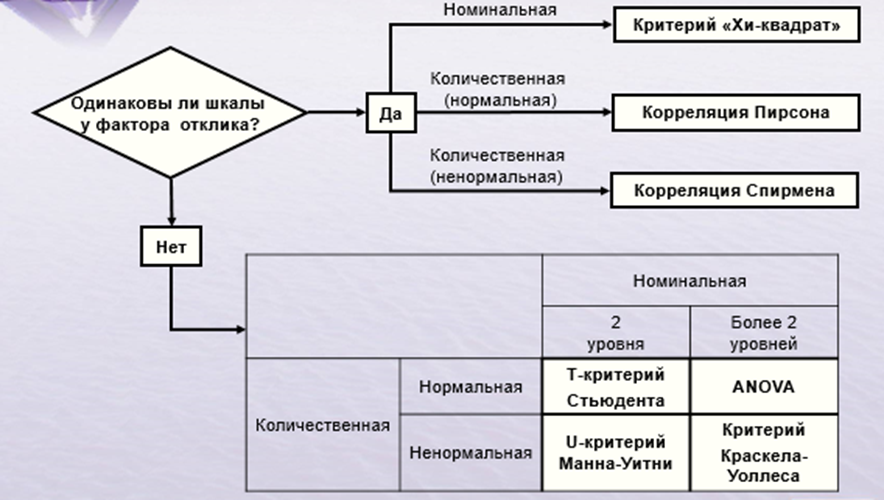

*В ходе проверки гипотез был выбран следующий набор параметров:*
- Уровень статистической значимости (p-уровень) установлен на 0.05.

Исследуемые параметры и краткий вывод:
>1. **Возраст (количественная)**: не влияет
>2. **АИК (интраоперационные)**: позитивная корреляция на уровне 2.3
>3. **Длительность работы АИК (интраоперационные)**: позитивная корреляция
>4. **Частота сокращений сердца (анамнез)**: не влияет
>5. **Мочевина в крови (биохимия)**: не влияет
>6. **ХБП: хроническая болезнь почек (анамнез)**: не влияет
>7. **Холестерин (биохимия)**: не влияет
>8. **Хронические болезни - гипертония, сахарный диабет, ХБП (анамнез)**: не влияет
>9. **Время пережатия аорты (интраоперационные)**: сам факт имеет позитивную корреляцую на уровне 2.3, а время нет
>10. **Калий (биохим)**: позитивно корреляция

В общем было рассмотрено 5 анамнез, 3 биохимия, 3 интраоперационные факторы

In [338]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [386]:
def check_normality(data):
    _, p_value_normality = stats.shapiro(data)
    if p_value_normality < 0.05:
        print("Данные распределены ненормально")
    else:
        print("Данные распределены нормально")


def _calc_corr_pvalue(group1, group2, method):
    if method == "Хи-квадрат":
        contigency_table = pd.crosstab(group1, group2)
        chi2 = stats.chi2_contingency(contigency_table)
        cor, pvalue = chi2.statistic, chi2.pvalue
    elif method == "Т-критерий Стьюдента":
        cor, pvalue = stats.ttest_ind(group1, group2, equal_var=False)
    elif method == "U-критерий Манна-Уитни":
        cor, pvalue = stats.mannwhitneyu(group1, group2)
    return round(cor, 2), round(pvalue, 2)


def check_hypothesis(group1, group2, method) -> None:
    cor, pvalue = _calc_corr_pvalue(group1, group2, method)
    print(f"корреляция={cor}, p-уровень={pvalue}")
    if pvalue < 0.05:
        print("Отвергнуть нулевую гипотезу")
    else:
        print("Мы не можем отвергнуть нулевую гипотезу")

Мы выдвигаем гипотезы по влиянию разных факторов на риск развития ОПП, поэтому шкала отклика для всех гипотез один - номинальная (2 уровень), поэтому делим данные на две части на основе наличие ОПП для удобства

In [340]:
data = pd.read_csv("content/processed_data.csv", encoding="utf-8")

# aki - Acute kidney injury (острое поражение почек)
aki_absent = data[data["развитие_опп"] == "нет"]
aki_present = data[data["развитие_опп"] == "есть"]

## 1. Возраст (количественная)

$H_{0}$: Нету корреляции между фактором возрастом и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором возрастом и откликом риском развития ОПП

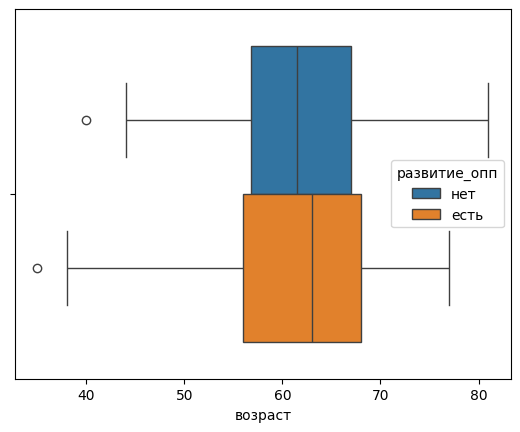

In [341]:
ax = sns.boxplot(x="возраст", hue="развитие_опп", data=data)

In [342]:
aki_absent_age = aki_absent["возраст"]
aki_present_age = aki_present["возраст"]

check_normality(aki_absent_age)
check_normality(aki_present_age)

Данные распределены нормально
Данные распределены ненормально


В одном из групп ненормальное распределение и шкала фактор - количественная, поэтому используем метод U-критерия Манна-Уитни

In [343]:
check_hypothesis(aki_absent_age, aki_present_age, method="U-критерий Манна-Уитни")

корреляция=3895.0, p-уровень=0.74
Мы не можем отвергнуть нулевую гипотезу


При таком уровне значимости можно сделать вывод, что нету корреляции между фактором возрастом и риском развития ОПП

## 2. АИК (интраоперационные)

$H_{0}$: Нету корреляции между фактором АИК и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором АИК и откликом риском развития ОПП

<Axes: xlabel='развитие_опп'>

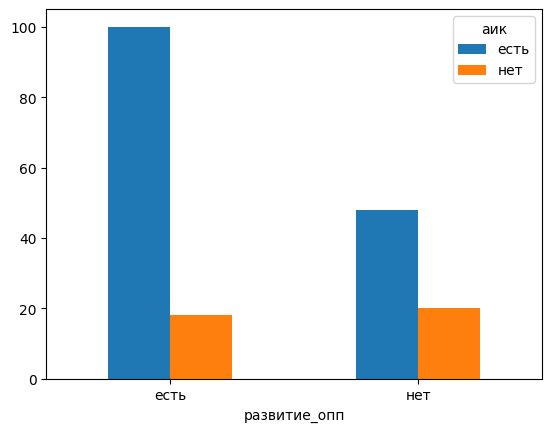

In [344]:
data = data.replace({"аик": {0: "нет", 1: "есть"}})
crosstab = pd.crosstab(index=data["развитие_опп"], columns=data["аик"])

crosstab.plot.bar(rot=0)

Фактор АИК - бинарный (номинальный), поэтому будет использован критерий "Хи-квадрат"

In [345]:
check_hypothesis(data["аик"], data["развитие_опп"], method="Хи-квадрат")

корреляция=4.48, p-уровень=0.03
Отвергнуть нулевую гипотезу


При таком уровне значимости можно сделать вывод, что присутсвует связь между фактором АИК и откликом риском развития ОПП. Исследуем эту связь дальше.

Рассмотрим насколько увеличиваеться вероятность развития ОПП при наличии АИК

In [346]:
res = stats.contingency.odds_ratio(crosstab)
round(res.statistic, 2)

2.3

Из этого следует вывод, что вероятность получить ОПП у пациентов с АИК в 2,3 раза выше, чем у пациентов без АИК

## 3. Длительность работы АИК (интраоперационные)

$H_{0}$: Нету корреляции между фактором длительности работы АИК и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором длительности работы АИК и откликом риском развития ОПП

Очевидно, что длительность работы АИК имеет место быть только при наличие АИК, поэтому будет исследовать только данные с наличием АИК

In [347]:
# hlm - heart lung machine (аппарат исскуственного кровообращения)
hlm_present = data[data['аик'] == 'есть']

<Axes: xlabel='длительность_аик'>

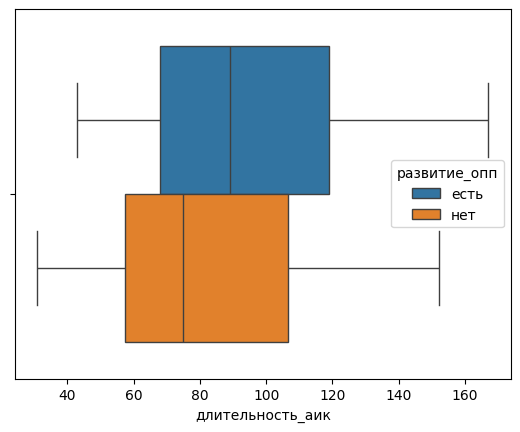

In [348]:
sns.boxplot(x=hlm_present['длительность_аик'], hue=hlm_present['развитие_опп'])

In [349]:
aki_absent_hlm_duration = hlm_present[hlm_present["развитие_опп"] == "нет"]["длительность_аик"]
aki_present_hlm_duration = hlm_present[hlm_present["развитие_опп"] == "есть"]["длительность_аик"]

check_normality(aki_absent_hlm_duration)
check_normality(aki_present_hlm_duration)

Данные распределены ненормально
Данные распределены ненормально


У обоих групп ненормальное распределние и фактор "длительность_аик" количественный, поэтому используем метод U-критерия Манна-Уитни

In [350]:
check_hypothesis(aki_absent_hlm_duration, aki_present_hlm_duration, method='U-критерий Манна-Уитни')

корреляция=1866.0, p-уровень=0.03
Отвергнуть нулевую гипотезу


При таком уровне значимости можно сделать вывод, что присутствует связь между фактором длительности АИК и откликом риском развития ОПП. Исследуем эту связь дальше

In [351]:
round(aki_present_hlm_duration.mean() / aki_absent_hlm_duration.mean(), 2)

1.15

Пациенты с ОПП имели на 15% больше длительности АИК чем пациненты без ОПП. Из этого следует вывод, что чем больше времени пациент проводит с АИК, то тем выше шансы получить ОПП

## 4. Частота сокращений сердца (анамнез)

$H_{0}$: Нету корреляции между фактором ЧСС и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором ЧСС и откликом риском развития ОПП  

<Axes: xlabel='чсс'>

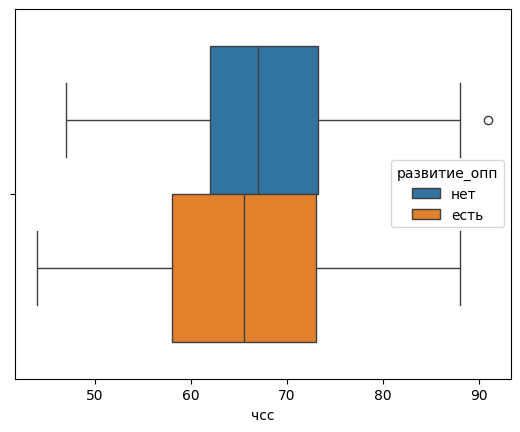

In [352]:
sns.boxplot(x="чсс", hue="развитие_опп", data=data)

In [353]:
aki_absent_heart_rate = aki_absent['чсс']
aki_present_heart_rate = aki_absent['чсс']

check_normality(aki_absent_heart_rate)
check_normality(aki_present_heart_rate)

Данные распределены нормально
Данные распределены нормально


У обоих групп нормальное распределение, поэтому используем метод Т-критерия Стьюдента

In [354]:
check_hypothesis(
    aki_absent_heart_rate, aki_present_heart_rate, method="Т-критерий Стьюдента"
)

корреляция=0.0, p-уровень=1.0
Мы не можем отвергнуть нулевую гипотезу


При таком уровне значимости можно сделать вывод, что точно нет корреляции между ЧСС и риском развития ОПП

## 5. Мочевина в крови (биохимия)

$H_{0}$: Нету корреляции между фактором мочевины в крови и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором мочевины в крови и откликом риском развития ОПП  

<Axes: xlabel='мочевина'>

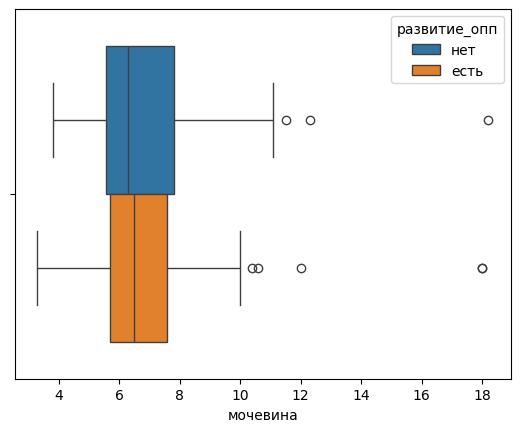

In [355]:
sns.boxplot(x='мочевина', hue='развитие_опп', data=data)

In [356]:
aki_absent_urea = aki_absent['мочевина']
aki_present_urea = aki_present['мочевина']

check_normality(aki_absent_urea)
check_normality(aki_present_urea)

Данные распределены ненормально
Данные распределены ненормально


Данные распределены ненормально, шкала фактора - количественная, поэтому используем U-критерий Манна-Уитни

In [357]:
check_hypothesis(aki_absent_urea, aki_present_urea, method="U-критерий Манна-Уитни")

корреляция=4004.5, p-уровень=0.98
Мы не можем отвергнуть нулевую гипотезу


При таком уровне значимости мы можем уверенно сказать, что нету связи между фактором ЧСС и откликом риском развития ОПП

## 6. ХБП - хроническая болезнь почек (анамнез)

$H_{0}$: Нету корреляции между фактором ХБП и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором ХБП и откликом риском развития ОПП  

<Axes: xlabel='развитие_опп'>

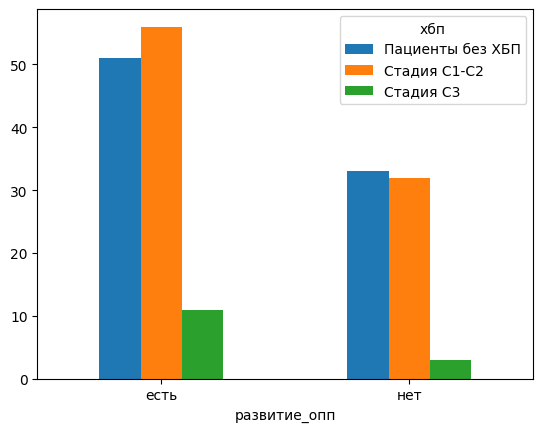

In [358]:
crosstab = pd.crosstab(index=data["развитие_опп"], columns=data["хбп"])

crosstab.plot.bar(rot=0)

In [359]:
check_hypothesis(data["хбп"], data["развитие_опп"], method="Хи-квадрат")

корреляция=1.65, p-уровень=0.44
Мы не можем отвергнуть нулевую гипотезу


При таком уровне значимости мы может заявить, что нету связи между фактором ХБП и откликом риском развития ОПП

## 7. Холестерин (биохимия)

$H_{0}$: Нету корреляции между фактором холестерин и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором холестерин и откликом риском развития ОПП  

<Axes: xlabel='холестерин'>

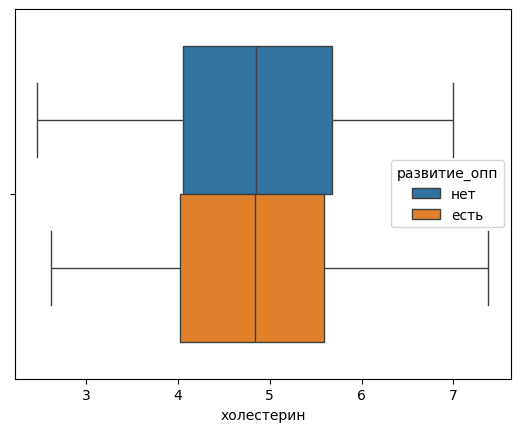

In [360]:
sns.boxplot(x='холестерин', hue='развитие_опп', data=data)

In [361]:
aki_absent_cholesterol = aki_absent['холестерин']
aki_present_cholesterol = aki_present['холестерин']

check_normality(aki_absent_cholesterol)
check_normality(aki_present_cholesterol)

Данные распределены нормально
Данные распределены нормально


Данные распределены нормально, шкала фактора - количественная, поэтому используем Т-критерий Стьюдента

In [362]:
check_hypothesis(aki_absent_cholesterol, aki_present_cholesterol, method='Т-критерий Стьюдента')

корреляция=-0.56, p-уровень=0.58
Мы не можем отвергнуть нулевую гипотезу


In [363]:
round(aki_present_cholesterol.mean() / aki_absent_cholesterol.mean(), 2)

1.02

При таком уровне значимости  и незначительной разницы в средних мы может заявить, что нету связи между фактором холестерин и откликом риском развития ОПП

## 8. Хронические болезни (анамнез)

Проверим каждую хроническую болезнь (гипертония, сахарный диабет, ХБП) на предмет связи с риском развития ОПП

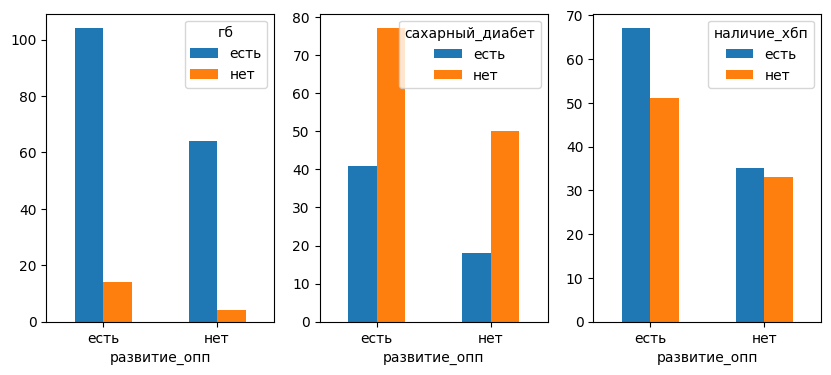

In [393]:
chronic_illnesses = ["гб", "сахарный_диабет", "наличие_хбп"]
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for i, chronic_illness in enumerate(chronic_illnesses):
    data = data.replace({chronic_illness: {0: "нет", 1: "есть"}})
    crosstab = pd.crosstab(index=data["развитие_опп"], columns=data[chronic_illness])

    crosstab.plot.bar(rot=0, ax=axs[i])

In [402]:
for chronic_illness in chronic_illnesses:
    _, pvalue = _calc_corr_pvalue(
        data[chronic_illness], data["развитие_опп"], method="Хи-квадрат"
    )
    print(f"pvalue={pvalue}")
    if pvalue < 0.05:
        print(
            f"Фактор '{chronic_illness}' имеет влияния на отклик риск развития ОПП. Исследуем эту связь"
        )
        crosstab = pd.crosstab(index=data["развитие_опп"], columns=data[chronic_illness])
        res = stats.contingency.odds_ratio(crosstab)
        print(
            f"Люди с '{chronic_illness}' имеют ОПП в {round(res.statistic, 2)} раза больше чем люди без"
        )
    else:
        print(
            f"Фактор '{chronic_illness}' не имеет влияния на отклик риск развития ОПП"
        )
    
    print('')

pvalue=0.28
Фактор 'гб' не имеет влияния на отклик риск развития ОПП

pvalue=0.32
Фактор 'сахарный_диабет' не имеет влияния на отклик риск развития ОПП

pvalue=0.58
Фактор 'наличие_хбп' не имеет влияния на отклик риск развития ОПП



Из этого следует вывод, что наличие хронических болезней никак не влияет на риск развитие ОПП

## 9. Время пережатия аорты (интраоперационные)

Так как факт пережатия аорты очень сильно влияет на почки, поэтому сперва нужно исследовать это, а потом устанавливать связь длительности пережатия и риском развития ОПП

### Фактор пережатия аорты

$H_{0}$: Нету корреляции между фактором фактом пережатии аорты и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором фактом пережатии аорты и откликом риском развития ОПП  

<Axes: xlabel='развитие_опп'>

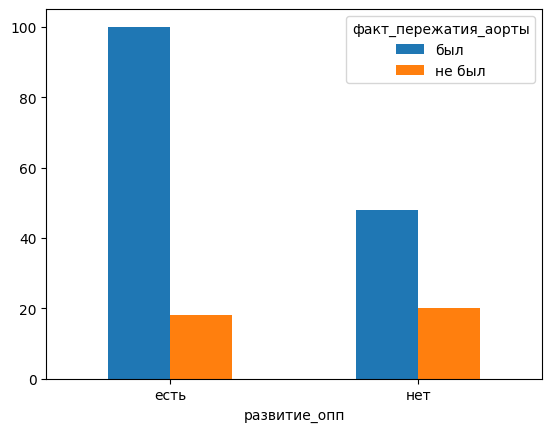

In [366]:
data["факт_пережатия_аорты"] = data["время_пережатия_аорты"].apply(
    lambda x: "был" if x > 0 else "не был"
)
crosstab = pd.crosstab(index=data["развитие_опп"], columns=data["факт_пережатия_аорты"])
crosstab.plot.bar(rot=0)

In [367]:
check_hypothesis(data["факт_пережатия_аорты"], data["развитие_опп"], method="Хи-квадрат")

корреляция=4.48, p-уровень=0.03
Отвергнуть нулевую гипотезу


При таком уровне значимости можно сказать, что факт пережатия аорты имеет влияние на риск развития ОПП. Исследуем эту связь

In [368]:
crosstab = pd.crosstab(index=data["развитие_опп"], columns=data["факт_пережатия_аорты"])
res = stats.contingency.odds_ratio(crosstab)
round(res.statistic, 2)

2.3

Из этого следует вывод, что вероятность получить ОПП у пациентов, у которых было пережатие аорты, выше на 2.3 раза, чем у пациентов не переживших это

### Время пережатия аорты

$H_{0}$: Нету корреляции между фактором временм пережатии аорты и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором времени пережатии аорты и откликом риском развития ОПП  

<Axes: xlabel='время_пережатия_аорты'>

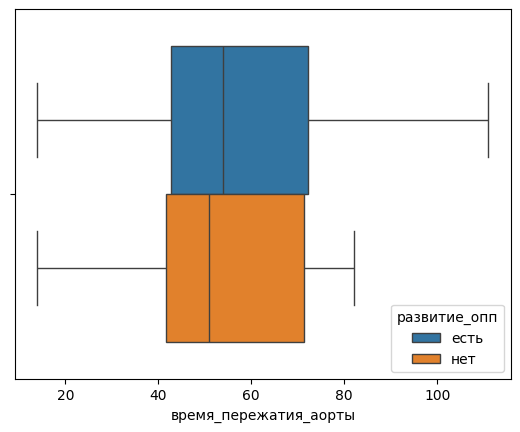

In [369]:
aorta_duration = data[data['время_пережатия_аорты'] > 0]
sns.boxplot(x='время_пережатия_аорты', hue='развитие_опп', data=aorta_duration)

In [370]:
aki_absent_aorta_duration = aorta_duration[aorta_duration["развитие_опп"] == "нет"]['время_пережатия_аорты']
aki_present_aorta_duration = aorta_duration[aorta_duration["развитие_опп"] == "есть"]['время_пережатия_аорты']

check_normality(aki_absent_aorta_duration)
check_normality(aki_present_aorta_duration)

Данные распределены нормально
Данные распределены нормально


Данные распределены нормально, шкала фактора - количественная, поэтому используем Т-критерий Стьюдента

In [371]:
check_hypothesis(aki_absent_aorta_duration, aki_present_aorta_duration, method='Т-критерий Стьюдента')

корреляция=-1.58, p-уровень=0.12
Мы не можем отвергнуть нулевую гипотезу


Из этого следует, что, хотя факт пережатия аорты сильно влияет на риск развития ОПП, но на сама длительность процесса не влияет на это

## 10. Калий (биохим)

$H_{0}$: Нету корреляции между фактором калий и откликом риском развития ОПП\
$H_{1}$: Есть корреляция между фактором калий и откликом риском развития ОПП  

<Axes: xlabel='калий'>

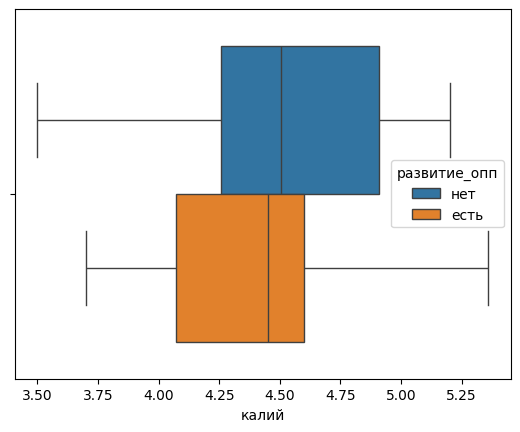

In [372]:
sns.boxplot(x='калий', hue='развитие_опп', data=data)

In [373]:
aki_absent_potassium = aki_absent['калий']
aki_present_potassium = aki_present['калий']

check_normality(aki_absent_potassium)
check_normality(aki_present_potassium)

Данные распределены ненормально
Данные распределены ненормально


Обе группы распределены ненормально, шкала фактора - количественная, поэтому используем U-критерий Манна-Уитни

In [374]:
check_hypothesis(aki_absent_potassium, aki_present_potassium, method='U-критерий Манна-Уитни')

корреляция=4854.0, p-уровень=0.02
Отвергнуть нулевую гипотезу


При таком уровне значимости можно сделать вывод, что уровень калия влияет на риск развития ОПП

# 5. Регрессионное моделирование
В данном пункте предоставлена реализация предсказаний количественного признака - калий, используя линейную регрессию.

*Задачи*:

1. Выявить самый значимый признак для предсказания таргета
2. Выбрать факторы для обучения модели предсказания этого признака
3. Обучить модель линейной регрессии
4. Проверить качество модели
5. Улучшить модель
6. Сделать вывод

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('content/processed_data.csv')
data.head()

развитие_опп               хбп  возраст  пол  гб  сахарный_диабет  \
0          нет      Стадия C1-C2       67    1   1                1   
1         есть      Стадия C1-C2       69    1   1                0   
2          нет  Пациенты без ХБП       50    1   1                0   
3          нет      Стадия C1-C2       62    1   1                0   
4         есть      Стадия C1-C2       55    1   1                1   

   стенокардия  инфаркт_миокарда  мерцательная_аритмия  \
0            1                 1                     0   
1            1                 0                     0   
2            1                 1                     0   
3            1                 1                     1   
4            1                 1                     0   

   желудочковая_экстрасистолия  ...  аик  количество_шунтов  \
0                            0  ...    0                  1   
1                            0  ...    1                  4   
2                            0  ...    0                  1   
3                            0  ...    1                  3   
4                            0  ...    1                  3   

   длительность_операции  длительность_аик  время_пережатия_аорты  \
0                  150.0               0.0                    0.0   
1                  235.0             143.0                   48.0   
2                  210.0               0.0                    0.0   
3                  210.0              71.0                   43.0   
4                  265.0             116.0                   74.0   

   объем_кровопотерии  объем_гемотрансфузии  объем_инфузий  диурез  \
0               200.0                 830.0         1200.0   900.0   
1               600.0                 640.0          900.0   800.0   
2               250.0                   0.0         1800.0   500.0   
3               500.0                1283.0         1700.0  1700.0   
4               500.0                1560.0         1800.0  1300.0   

   аик_с_переливанием_крови  
0                         0  
1                         1  
2                         0  
3                         1  
4                         1  

[5 rows x 68 columns]

Исходя из ТЗ составим список признаков, которые важны для предсказания таргета - острого поражения почек

In [ ]:
target_features = [
    'развитие_опп',
    'возраст',
    'сахарный_диабет',
    'гб',
    'хбп',
    'сад',
    'дад',
    'чсс',
    'рн',
    'фракция_изгнания',
    'холестерин',
    'креатинин_крови',
    'мочевина',
    'скф_расч',
    'калий',
    'имт',
    'толщина_паренхимы_почек'
]

#### Закодируем категориальные признаки в числовые
Хроническая болезнь почек

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['хбп'] = encoder.fit_transform(data['хбп'])

data['хбп'].value_counts()

хбп
1    88
0    84
2    14
Name: count, dtype: int64

Острое поражение почек

In [ ]:
data['развитие_опп'] = data['развитие_опп'].apply(lambda x: 1 if x == 'есть' else 0)
data['развитие_опп'].value_counts()

развитие_опп
1    118
0     68
Name: count, dtype: int64

## Выявляем самый значимый фактор для предсказания целевой переменной - ОПП

Посмотрим на сформированную выборку параметров, важных для предсказания ОПП

In [ ]:
sample = data[target_features]
sample.head()

развитие_опп  возраст  сахарный_диабет  гб  хбп    сад   дад   чсс    рн  \
0             0       67                1   1    1  130.0  80.0  61.0  7.42   
1             1       69                0   1    1  140.0  90.0  66.0  7.49   
2             0       50                0   1    0  130.0  90.0  67.0  7.37   
3             0       62                0   1    1  120.0  80.0  67.0  7.44   
4             1       55                1   1    1  130.0  80.0  81.0  7.41   

   фракция_изгнания  холестерин  креатинин_крови  мочевина  скф_расч  калий  \
0              68.0        2.47             94.0       8.2      86.0   4.51   
1              54.0        5.73            119.0       6.2      63.0   4.92   
2              60.0        6.22             95.0       5.5     105.0   4.50   
3              57.0        4.22            113.0       5.9      68.0   4.68   
4              67.0        3.52            117.0       5.3      95.0   4.48   

    имт  толщина_паренхимы_почек  
0  30.0                     14.0  
1  29.0                     15.0  
2  30.0                     17.0  
3  30.0                     16.0  
4  33.0                     15.0

Разделяем таргет от остальных фичей

In [ ]:
y = sample['развитие_опп']
X = sample.drop(columns=['развитие_опп'])

Чтобы оценить и отобрать K наиболее значимых для таргета признаков, тем самым исключив менее важные, используем метод SelectKBest из библиотеки sklearn.

В качестве оценочной функции для этого метода возьмем - f_classif, поскольку целевая переменная - бинарный признак с двумя категориями (есть/нет).

Значение k принимаем за 1, поскольку наша задача - отобрать самый важный признак

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=1)
selector.fit(X, y)
selected_feature = selector.get_feature_names_out()

selected_feature

array(['калий'], dtype=object)

Посмотрим на корелляцию таргета с остальными признаками

In [ ]:
sample.corr()

развитие_опп   возраст  сахарный_диабет        гб  \
развитие_опп                 1.000000  0.010709         0.085634 -0.097444   
возраст                      0.010709  1.000000         0.121061 -0.117252   
сахарный_диабет              0.085634  0.121061         1.000000  0.027730   
гб                          -0.097444 -0.117252         0.027730  1.000000   
хбп                          0.079293  0.211672         0.041027 -0.051981   
сад                         -0.072939 -0.004459         0.076149  0.186336   
дад                         -0.023495 -0.047966         0.048713  0.327631   
чсс                         -0.113312 -0.080713         0.058668  0.058588   
рн                           0.132377  0.068495        -0.053791 -0.058061   
фракция_изгнания            -0.117033  0.024595        -0.033042 -0.058194   
холестерин                   0.041518  0.024698        -0.098615 -0.018528   
креатинин_крови             -0.138270  0.153651        -0.046365  0.143379   
мочевина                    -0.024574  0.172237         0.039291  0.081217   
скф_расч                    -0.014830 -0.505358         0.052813  0.020685   
калий                       -0.161594 -0.002204         0.220482  0.014556   
имт                          0.008926 -0.172149         0.143318  0.112881   
толщина_паренхимы_почек     -0.046524 -0.149527         0.058100  0.008345   

                              хбп       сад       дад       чсс        рн  \
развитие_опп             0.079293 -0.072939 -0.023495 -0.113312  0.132377   
возраст                  0.211672 -0.004459 -0.047966 -0.080713  0.068495   
сахарный_диабет          0.041027  0.076149  0.048713  0.058668 -0.053791   
гб                      -0.051981  0.186336  0.327631  0.058588 -0.058061   
хбп                      1.000000  0.084111 -0.002382 -0.067568  0.113929   
сад                      0.084111  1.000000  0.477093 -0.095734 -0.025104   
дад                     -0.002382  0.477093  1.000000  0.059528 -0.052828   
чсс                     -0.067568 -0.095734  0.059528  1.000000  0.026134   
рн                       0.113929 -0.025104 -0.052828  0.026134  1.000000   
фракция_изгнания        -0.045358 -0.039892 -0.064179 -0.055745  0.060155   
холестерин               0.123059  0.141192  0.235027 -0.014750  0.016764   
креатинин_крови          0.036103  0.102827  0.050419 -0.110289  0.035380   
мочевина                 0.324757  0.254451  0.090026 -0.134130 -0.050085   
скф_расч                -0.233090 -0.016289 -0.061299  0.100211 -0.268804   
калий                    0.133628  0.029823  0.081062  0.069692 -0.210630   
имт                     -0.248328  0.030183  0.039114  0.110860 -0.229556   
толщина_паренхимы_почек -0.327746 -0.139457 -0.027669  0.087680 -0.129592   

                         фракция_изгнания  холестерин  креатинин_крови  \
развитие_опп                    -0.117033    0.041518        -0.138270   
возраст                          0.024595    0.024698         0.153651   
сахарный_диабет                 -0.033042   -0.098615        -0.046365   
гб                              -0.058194   -0.018528         0.143379   
хбп                             -0.045358    0.123059         0.036103   
сад                             -0.039892    0.141192         0.102827   
дад                             -0.064179    0.235027         0.050419   
чсс                             -0.055745   -0.014750        -0.110289   
рн                               0.060155    0.016764         0.035380   
фракция_изгнания                 1.000000   -0.069549        -0.043004   
холестерин                      -0.069549    1.000000        -0.116247   
креатинин_крови                 -0.043004   -0.116247         1.000000   
мочевина                        -0.165238    0.105933         0.219784   
скф_расч                        -0.041970    0.058206        -0.403649   
калий                            0.083477    0.026984         0.073558   
имт                             -0.120257    0.00

Было обнаружено, что коэффициент корелляции таргета с калием по модулю оказался максимальным значением среди остальных (-0.16). Несмотря на слабую корелляцию, это говорит о том, что признак лучше всего кореллирует с таргетом

## Выбираем факторы для предсказания признака

Для выбора факторов будем отталкиваться от значений коэффициента корелляции, по модулю которые не менее 0.15

In [ ]:
features = []
corr_coefs = []

for col in list(data.columns):
    corr = data['калий'].corr(data[col])
    if abs(corr) >= 0.15:
        features.append(col)
        corr_coefs.append(round(corr, 2))

correlation_features = pd.DataFrame({'признак': features, 'кор': corr_coefs})
correlation_features

признак   кор
0               развитие_опп -0.16
1            сахарный_диабет  0.22
2                      калий  1.00
3                     натрий  0.22
4                         рн -0.21
5                       рсо2  0.26
6                        хсн  0.16
7                         уо -0.24
8                         мо -0.23
9                        кдо -0.17
10                      алат  0.25
11      объем_гемотрансфузии  0.16
12  аик_с_переливанием_крови  0.17

Посмотрим на полученную выборку

In [ ]:
sample = data[features]
sample.head()

развитие_опп  сахарный_диабет  калий  натрий    рн  рсо2  хсн     уо    мо  \
0             0                1   4.51   143.0  7.42  33.4    1  113.0  6.78   
1             1                0   4.92   140.0  7.49  31.6    1   97.0  5.82   
2             0                0   4.50   140.0  7.37  34.0    1   71.0  4.26   
3             0                0   4.68   147.0  7.44  33.4    1  109.0  6.54   
4             1                1   4.48   141.0  7.41  41.7    1   83.0  4.98   

     кдо  алат  объем_гемотрансфузии  аик_с_переливанием_крови  
0  167.0  41.0                 830.0                         0  
1  180.0  39.0                 640.0                         1  
2  118.0  29.0                   0.0                         0  
3  160.0  19.0                1283.0                         1  
4  124.0  19.0                1560.0                         1

## Обучение модели

Резделяем таргет от фичей

In [ ]:
y = sample['калий']
X = sample.drop(columns=['калий'])

Делим на train и test. Размер тестовой выборки - 15% ввиду малого количества данных в датасете

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.15
)

Обучаем модель линейной регрессии на наших данных. Смотрим на функцию потерь

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

print(f'RMSE = {RMSE}')

RMSE = 0.296


Посмотрим на распределения предсказаний

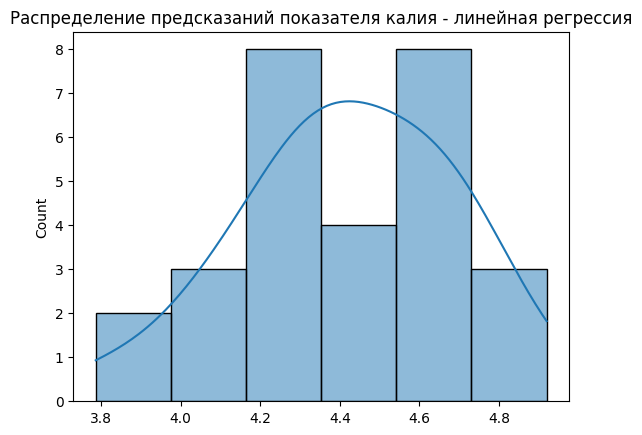

In [ ]:
sns.histplot(y_pred, kde=True)
plt.title('Распределение предсказаний показателя калия - линейная регрессия')
None

Для проверки нашей модели используем базовую регрессию. В качестве стратегии обучения возьмем медианное значение по набору данных, так как во многих признаках распределение далеко от нормального.

Смотрим на функцию потерь

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy='median')
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)

RMSE_dummy = round(mean_squared_error(y_test, y_pred_dummy, squared=False), 3)

print(f'Dummy RMSE = {RMSE_dummy}')

Dummy RMSE = 0.352


Получилось, что функция потерь оказалась больше, чем функция потерь модели линейной регрессии

Посмотрим на предсказания базовой модели

In [ ]:
y_pred_dummy

array([4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45,
       4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45, 4.45,
       4.45, 4.45, 4.45, 4.45, 4.45, 4.45])

Сравним функции потерь у базовой регрессии и линейной регрессии в виде разности первого и второго

In [ ]:
round(RMSE_dummy - RMSE, 2)

0.06

## Улучшение модели

Для реализации улучшения модели был использован метод кросс-валидации с выбором модели, имеющую лучшую метрику на фолде. Оптимальное количество n_splits=6 было подобрано экспериментальным путем сравнения качества метрики на разных значениях n_splits

Обучаем модель

In [ ]:
from sklearn.model_selection import KFold


kfold = KFold(n_splits=6)

best_rmse = np.inf  # Максимально возможное значение
best_fold = None

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Если новая метрика меньше лучшей
    if rmse < best_rmse:
        best_rmse = rmse
        best_fold = (X_train, X_test, y_train, y_test)

Выбираем модель с лучшей метрикой на фолде и обучаем ее на нашей выборке. Смотрим на функцию потерь

In [ ]:
# Берем данные из лучшего фолда
best_X_train, best_X_test, best_y_train, best_y_test = best_fold

best_model = LinearRegression()
best_model.fit(best_X_train, best_y_train)

y_pred = best_model.predict(X_test)

RMSE_best = round(mean_squared_error(y_test, y_pred, squared=False), 3)

print(f'RMSE = {RMSE_best}')

RMSE = 0.258


Распределение предсказаний

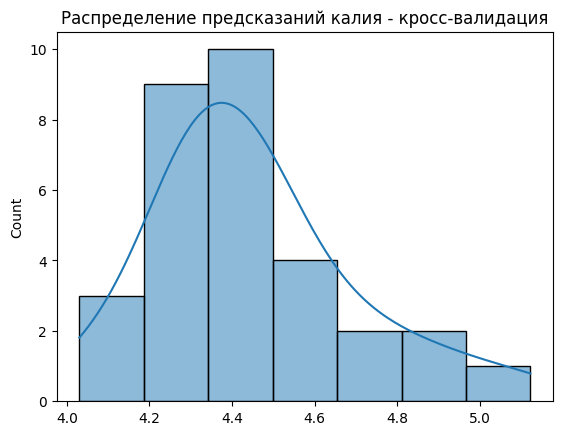

In [ ]:
sns.histplot(y_pred, kde=True)
plt.title('Распределение предсказаний калия - кросс-валидация')
None

Описательные статистики предсказаний

In [ ]:
pd.Series(y_pred).describe()

count    31.000000
mean      4.453093
std       0.245226
min       4.030434
25%       4.291231
50%       4.416917
75%       4.547076
max       5.122892
dtype: float64

Сравниваем функции потерь

Базовая регрессия (dummy regression) с кросс-валидацией

In [ ]:
round(RMSE_dummy - RMSE_best, 3)

0.094

Линейная регрессия (linear regression) с кросс-валидацией

In [ ]:
round(RMSE - RMSE_best, 3)

0.038

## Вывод

В результате анализа стало очевидным, что линейная регрессия предсказывает данные более точно и ближе к реальным значениям. Это подтверждается разницей в функциях потерь: у линейной регрессии значение на 0.06 меньше, чем у базовой модели, что свидетельствует о превосходстве линейной регрессии как более эффективной модели для данного набора данных.

Кроме того, стоит отметить, что модель линейной регрессии, обученная с использованием кросс-валидации, продемонстрировала значительно лучшие результаты по сравнению с остальными моделями. Итоговая метрика составила 0.258, что указывает на способность модели улавливать более сложные зависимости в данных по сравнению с простой линейной регрессией.